In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
model = ExtraTreesRegressor(random_state=1)

# Loading Data

In [3]:
study = pd.read_csv('../brassica.csv')
study = study.drop(['crossovers', 'gametes', 'R', 'd', 'cM', 'gene', 'mRNA', 'exon', 'CDS'], axis = 1)
study = study.iloc[:,0:70] # Selecting columns with labels and k-mers counts
study

cross reference   chr     start       end      srec  \
0       broccoli_cauliflower  broccoli  chr1         0    100000  0.000000   
1       broccoli_cauliflower  broccoli  chr1    100000    200000  0.000000   
2       broccoli_cauliflower  broccoli  chr1    200000    300000  0.000000   
3       broccoli_cauliflower  broccoli  chr1    300000    400000  0.036497   
4       broccoli_cauliflower  broccoli  chr1    400000    500000  0.032847   
...                      ...       ...   ...       ...       ...       ...   
103831        white_kohlrabi  kohlrabi  chr9  64400000  64500000  0.189701   
103832        white_kohlrabi  kohlrabi  chr9  64500000  64600000  0.170731   
103833        white_kohlrabi  kohlrabi  chr9  64600000  64700000  0.153658   
103834        white_kohlrabi  kohlrabi  chr9  64700000  64800000  0.138292   
103835        white_kohlrabi  kohlrabi  chr9  64800000  64900000  0.124463   

         AAA   AAC   AAG   AAT  ...  TCG   TCT   TGA   TGC   TGG   TGT   TTA  \
0       4884  2093  1508  3401  ...  758  2378  1552   882  1513  2010  2825   
1       4192  1771  2066  2806  ...  889  2447  1959  1156  1358  1976  2447   
2       4569  1884  1869  3102  ...  724  2139  2132   988  1437  1977  2988   
3       4655  2071  1872  3026  ...  856  2339  1820   984  1238  1809  2746   
4       4945  1924  1980  3122  ...  922  2280  1884   906  1250  1919  2783   
...      ...   ...   ...   ...  ...  ...   ...   ...   ...   ...   ...   ...   
103831  5056  2332  1546  3461  ...  665  2594  1825  1001  1296  1958  3030   
103832  4649  2169  1725  2974  ...  658  2066  1814   966  1094  1888  3522   
103833  4837  1937  2054  3112  ...  801  2030  1964   986  1239  1893  2833   
103834  5965  1965  1907  3718  ...  622  1697  2234   858  1084  1893  3241   
103835  5281  2104  1733  3356  ...  694  2032  2176   941  1237  1903  2948   

         TTC   TTG   TTT  
0       2424  1812  5327  
1       2234  2312  4415  
2       2071  2348  5146  
3       2284  2055  4928  
4       2214  2158  4938  
...      ...   ...   ...  
103831  2138  2171  6190  
103832  1985  1964  5452  
103833  2092  2232  4736  
103834  1696  2207  4896  
103835  1850  2238  4993  

[103836 rows x 70 columns]

# Reverse-complements

In [5]:
df_original = study
df_new = df_original[['cross','reference','chr', 'start', 'end','srec']].copy()

# List of complementary trimers
complementaries = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}

# Set to track processed trimers
processed = set()

# Iterate over the columns of the original DataFrame
for column in df_original.columns[6:-1]:  # Start from the eleventh column
    trimer = column[:3]  # Get the current trimer (e.g., 'AAA')
    
    # Avoid processing the same trimer more than once
    if trimer not in processed:
        complementary = ''.join([complementaries[base] for base in reversed(trimer)])  # Get the complementary trimer (e.g., 'TTT')
        
        # Sum the corresponding columns and add a new column to the new DataFrame
        df_new[trimer + '_' + complementary] = df_original[trimer] + df_original[complementary]
        
        # Add the trimer and its complementary to the set of processed trimers
        processed.add(trimer)
        processed.add(complementary)
        
study2 = df_new

In [6]:
broccoli_kohlrabi = study2[study2['cross'] == 'broccoli_kohlrabi']

In [7]:
broccoli_kohlrabi

cross reference   chr     start       end      srec  \
10305  broccoli_kohlrabi  broccoli  chr1         0    100000  0.000000   
10306  broccoli_kohlrabi  broccoli  chr1    100000    200000  0.000000   
10307  broccoli_kohlrabi  broccoli  chr1    200000    300000  0.000000   
10308  broccoli_kohlrabi  broccoli  chr1    300000    400000  0.000000   
10309  broccoli_kohlrabi  broccoli  chr1    400000    500000  0.068186   
...                  ...       ...   ...       ...       ...       ...   
20671  broccoli_kohlrabi  kohlrabi  chr9  64400000  64500000  0.232883   
20672  broccoli_kohlrabi  kohlrabi  chr9  64500000  64600000  0.209595   
20673  broccoli_kohlrabi  kohlrabi  chr9  64600000  64700000  0.188635   
20674  broccoli_kohlrabi  kohlrabi  chr9  64700000  64800000  0.169772   
20675  broccoli_kohlrabi  kohlrabi  chr9  64800000  64900000  0.152795   

       AAA_TTT  AAC_GTT  AAG_CTT  AAT_ATT  ...  CTA_TAG  CTC_GAG  GAA_TTC  \
10305    10211     4046     3224     6793  ...     2808     2650     4062   
10306     8607     3784     4268     5584  ...     2366     3114     4309   
10307     9715     4085     3807     6370  ...     2876     2681     4269   
10308     9583     3997     3850     6207  ...     2730     2744     4189   
10309     9883     3941     4052     6189  ...     2442     2812     4330   
...        ...      ...      ...      ...  ...      ...      ...      ...   
20671    11246     4299     3298     7081  ...     3236     2497     4036   
20672    10101     4700     3424     6216  ...     3550     2464     3793   
20673     9573     3974     3906     6380  ...     2617     2697     4222   
20674    10861     4256     3452     7026  ...     3009     2545     4034   
20675    10274     4087     3565     6577  ...     2821     2681     4143   

       GAC_GTC  GCA_TGC  GCC_GGC  GGA_TCC  GTA_TAC  TAA_TTA  TCA_TGA  
10305     1442     1875     1694     2040     2575     5867     3734  
10306     1886     2236     1366     2460     2462     4906     3900  
10307     1608     1965     1048     2261     2642     5753     3912  
10308     1819     2026     1100     2224     2473     5611     3977  
10309     1819     1813     1146     2323     2409     5599     3867  
...        ...      ...      ...      ...      ...      ...      ...  
20671     1427     1941      843     1958     2721     6321     3730  
20672     1499     1899      856     1995     2509     6623     3638  
20673     1637     2012     1089     2204     2635     5604     3884  
20674     1621     1814      814     2014     2587     6326     3948  
20675     1672     1876     1104     2187     2488     5802     3849  

[10371 rows x 38 columns]

In [9]:
b = broccoli_kohlrabi[broccoli_kohlrabi['reference']=='broccoli']

In [10]:
ko = broccoli_kohlrabi[broccoli_kohlrabi['reference']=='kohlrabi']

# BROCCOLI GENOME

# Data exploration

In [11]:
df = b

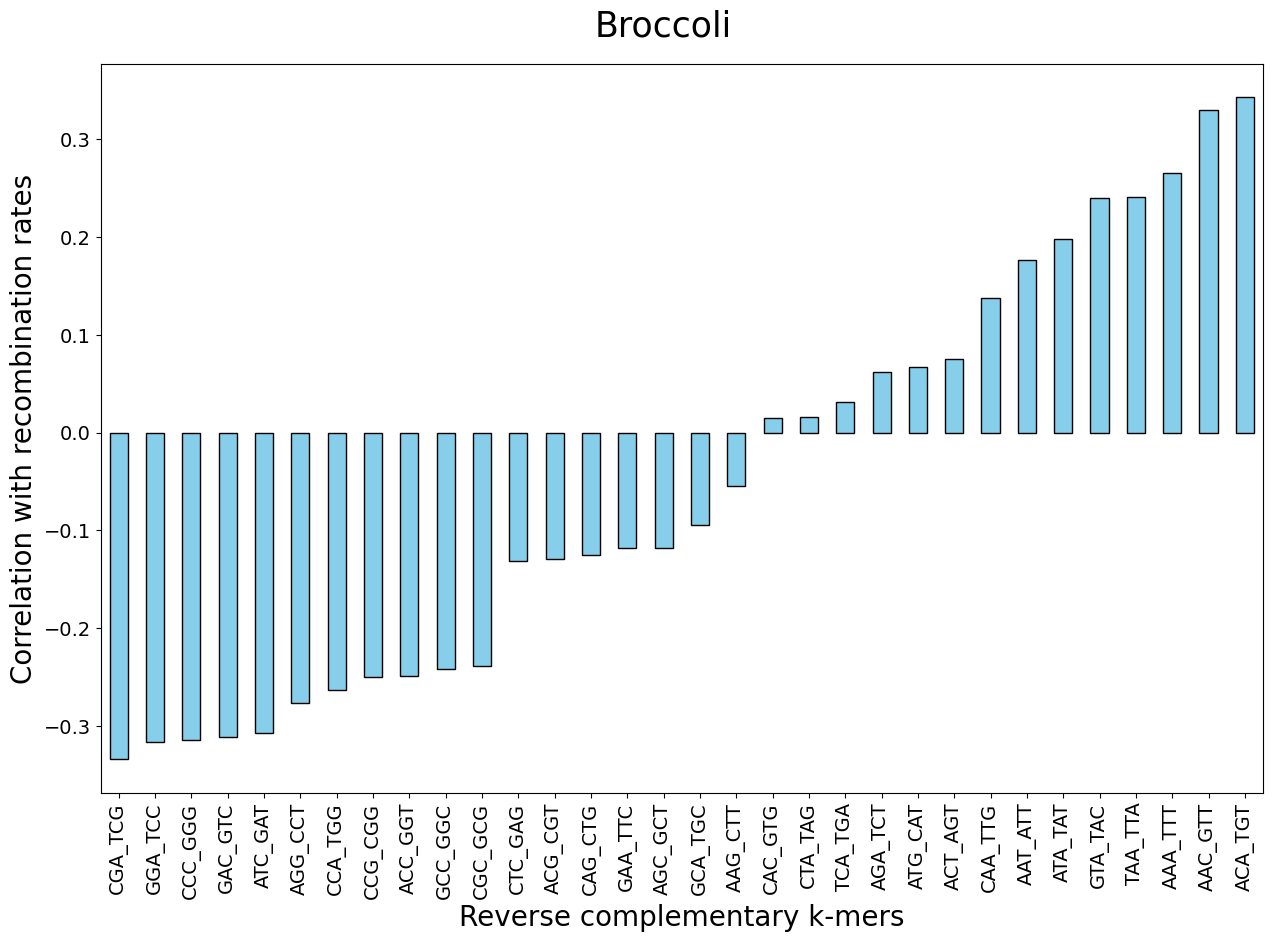

In [12]:
df_stats = df.drop(['cross', 'reference','chr','start','end'],  axis=1)
df_stats_corr = df_stats.corr()['srec'].sort_values(ascending = True)
df_corr = df_stats.corr()
df_corr = df_corr.iloc[1:, :]
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(111)
df_corr['srec'].sort_values(ascending = True).plot(kind = 'bar', color='skyblue', edgecolor='black')
ax.set_xlabel('Reverse complementary k-mers', fontsize=20)
ax.set_ylabel('Correlation with recombination rates', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.suptitle('Broccoli', fontsize=25)
plt.subplots_adjust(top=0.92)

plt.show()

# Chromosome Split

In [13]:
chr1 = df[df['chr']== 'chr1']
chr2 = df[df['chr']== 'chr2']
chr3 = df[df['chr']== 'chr3']
chr4 = df[df['chr']== 'chr4']
chr5 = df[df['chr']== 'chr5']
chr6 = df[df['chr']== 'chr6']
chr7 = df[df['chr']== 'chr7']
chr8 = df[df['chr']== 'chr8']
chr9 = df[df['chr']== 'chr9']

In [14]:
achr1 = df[df['chr']!= 'chr1']
achr2 = df[df['chr']!= 'chr2']
achr3 = df[df['chr']!= 'chr3']
achr4 = df[df['chr']!= 'chr4']
achr5 = df[df['chr']!= 'chr5']
achr6 = df[df['chr']!= 'chr6']
achr7 = df[df['chr']!= 'chr7']
achr8 = df[df['chr']!= 'chr8']
achr9 = df[df['chr']!= 'chr9']

# Function to train models and make graphs

The model is trained with the information of all chromosomes except the information of the chromosome to be predicted.

In [15]:
def plot_chromosome_results(chr_number):
    # Replace  with 'chr{chr_number}' 
    chromosomes_data = globals()[f'achr{chr_number}']
    chr_data = globals()[f'chr{chr_number}']

    # TRAINING MODEL
    X_train = chromosomes_data.drop(['cross', 'reference','chr','start','end','srec'], axis=1)
    y_train = chromosomes_data[['srec']]

    model.fit(X_train, y_train)
    model_preds = model.predict(chr_data.drop(['cross', 'reference','chr','start','end','srec'], axis=1))
    
    #SMOOTHING
    model_spreds= np.zeros(len(model_preds))

    for i in  range(1, len(model_preds)): 
        model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9
        
    #CORRELATIONS BY QUARTILES
    c_q1 = int(len(chr_data)*0.25)
    c_q2 = int(len(chr_data)*0.50)
    c_q3 = int(len(chr_data)*0.75)
    
    rq1 = chr_data['srec'].iloc[0:c_q1]
    rq2 = chr_data['srec'].iloc[c_q1:c_q2]
    rq3 = chr_data['srec'].iloc[c_q2:c_q3]
    rq4 = chr_data['srec'].iloc[c_q3:int(len(chr_data))]

    pq1 = model_spreds[0:c_q1]
    pq2 = model_spreds[c_q1:c_q2]
    pq3 = model_spreds[c_q2:c_q3]
    pq4 = model_spreds[c_q3:int(len(chr_data))]

    corr_q1 = np.corrcoef(rq1, pq1)[0, 1]
    corr_q2 = np.corrcoef(rq2, pq2)[0, 1]
    corr_q3 = np.corrcoef(rq3, pq3)[0, 1]
    corr_q4 = np.corrcoef(rq4, pq4)[0, 1]
    
    globals()[f'corr_q1_chr{chr_number}'] = corr_q1
    globals()[f'corr_q2_chr{chr_number}'] = corr_q2
    globals()[f'corr_q3_chr{chr_number}'] = corr_q3
    globals()[f'corr_q4_chr{chr_number}'] = corr_q4
     
    # PLOTTING RESULTS
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4), gridspec_kw={'width_ratios': [10, 3]})

    # Line plot and correlation plot
    ax1.plot(chr_data.end, chr_data.srec, label='Recombination')
    ax1.plot(chr_data.end, model_spreds, label='Prediction', color='green')
    ax1.set_title(f'Broccoli Chromosome {chr_number}', fontsize=20)
    ax1.set_xlabel('chromosomes position (Mb)', fontsize=15)
    ax1.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
    ax1.legend(loc='upper right', fontsize=12)
    ticks = ax1.get_xticks() / 1000000
    ax1.set_xticklabels(ticks)
        
    chr_len = chr_data["end"].iloc[-1]
    q1 =round(chr_len * 0.25 / 100000) * 100000
    q2 =round(chr_len* 0.50 / 100000) * 100000
    q3 =round(chr_len * 0.75 / 100000) * 100000

    ax1.axvline(x=q1, color='gray', linestyle='-')
    ax1.axvline(x=q2, color='gray', linestyle='--')
    ax1.axvline(x=q3, color='gray', linestyle='-')

    # Scatter plot
    scatter = ax2.scatter(chr_data.srec, model_spreds, c='skyblue', edgecolors='black', linewidth= 0.3)
    ax2.set_title('Recombination vs. Prediction', fontsize=15)
    ax2.set_xlabel('Recombination', fontsize=15)
    ax2.set_ylabel('Prediction', fontsize=15)

    # Calculate correlation coefficient, coefficient of determination, and Mean Squared Error
    corr_chr = np.corrcoef(chr_data.srec, model_spreds)[0, 1]
    r2_chr = r2_score(chr_data.srec, model_spreds)
    mse_chr = mean_squared_error(chr_data.srec, model_spreds)

    # Calculate the aspect ratio based on the plot heights
    h1 = ax1.get_ylim()
    h2 = ax2.get_ylim()
    aspect_ratio = max(h1[1] - h1[0], h2[1] - h2[0]) / (max(h1[1], h2[1]) - min(h1[0], h2[0]))

    # Set the aspect ratio for the scatter plot only if it doesn't distort the square shape
    if aspect_ratio < 1:
        ax2.set_aspect('equal')

    # Display correlation coefficient, coefficient of determination, and Mean Squared Error as plain text
    globals()[f'corr_chr{chr_number}'] = corr_chr
    globals()[f'r2_chr{chr_number}'] = r2_chr
    globals()[f'mse_chr{chr_number}'] = mse_chr

    textstr = f'Correlation: {corr_chr:.3f}\nR-squared: {r2_chr:.3f}\nMSE: {mse_chr:.3f}'
    ax2.text(0.05, 0.95, textstr, transform=ax2.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

    # Adjustments to align the heights of the two plots
    max_height = max(h1[1], h2[1])
    ax1.set_ylim([h1[0], max_height])
    ax2.set_ylim([h2[0], max_height])

    # Reduce the separation between the plots
    plt.subplots_adjust(wspace=0.1)
    plt.show()

# Model Predictions

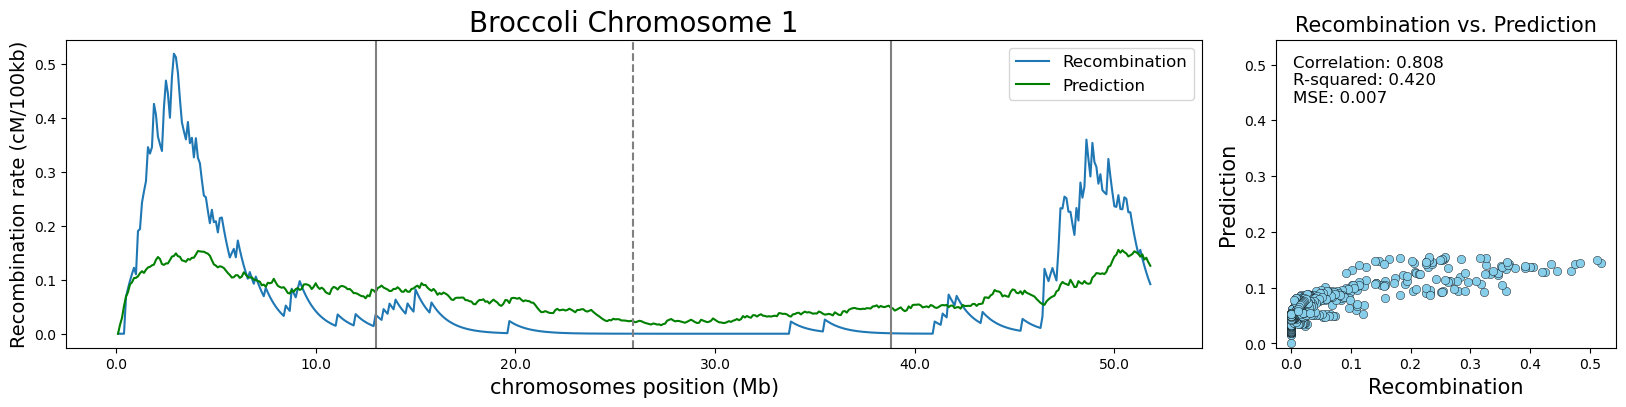

In [16]:
# Predictions for one chromosome, example: Chromosome 1
plot_chromosome_results(1)

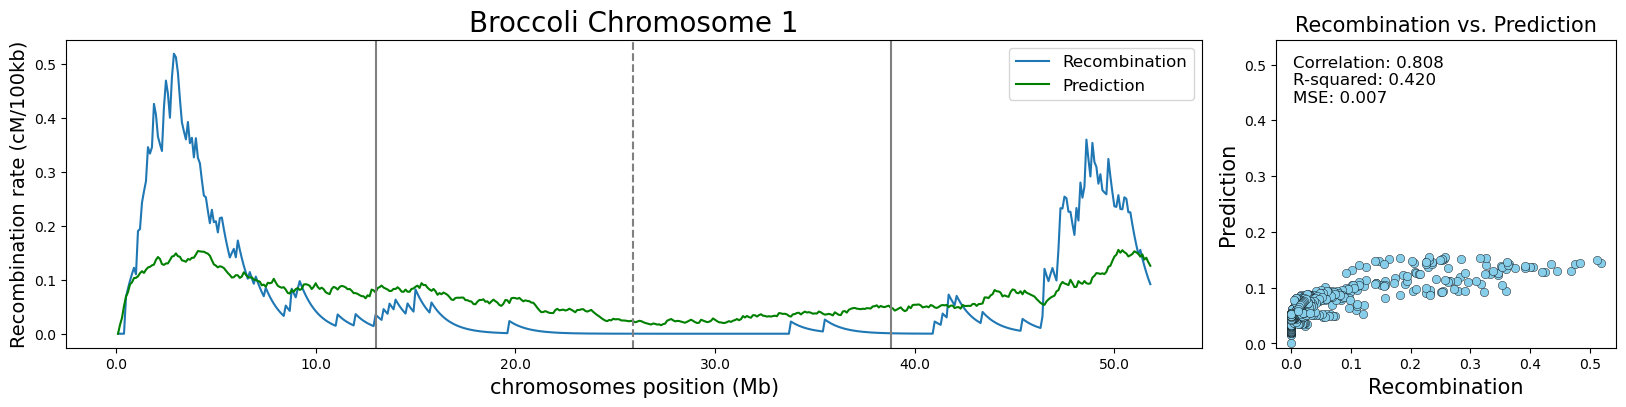

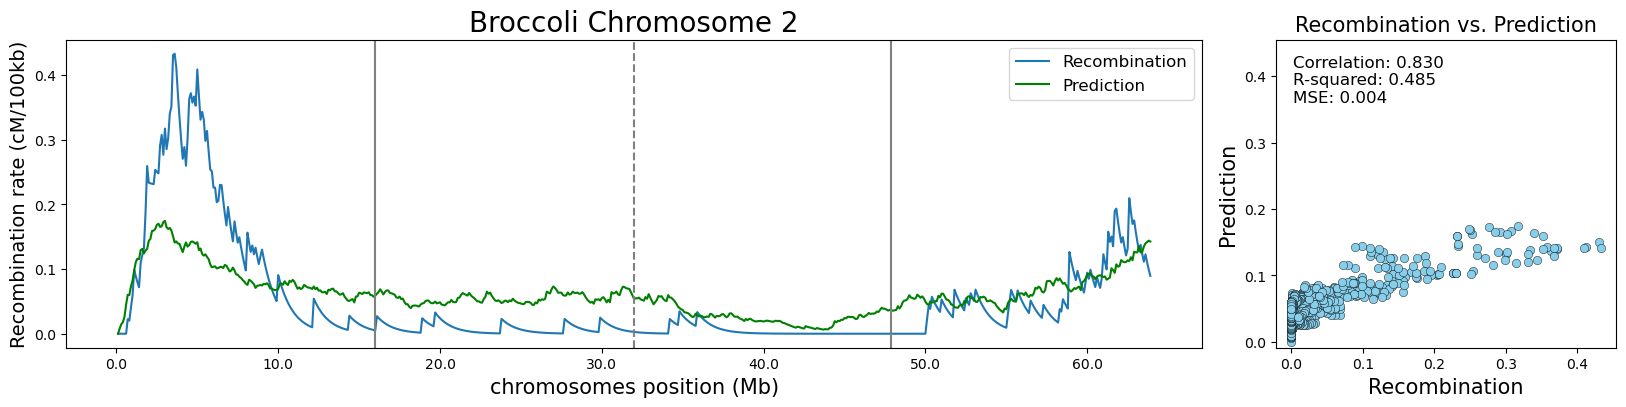

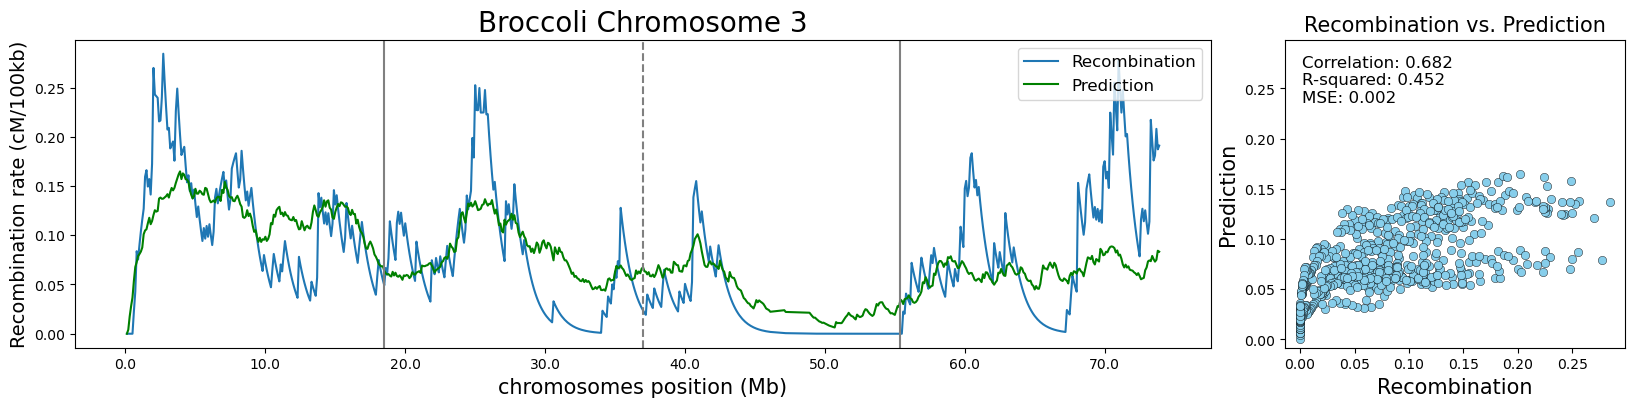

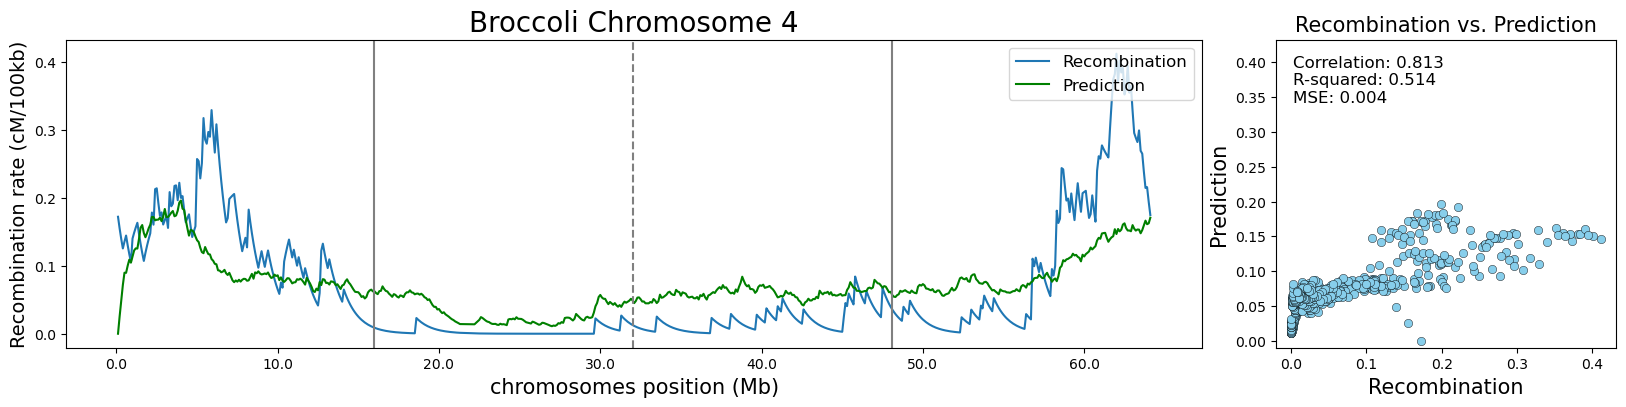

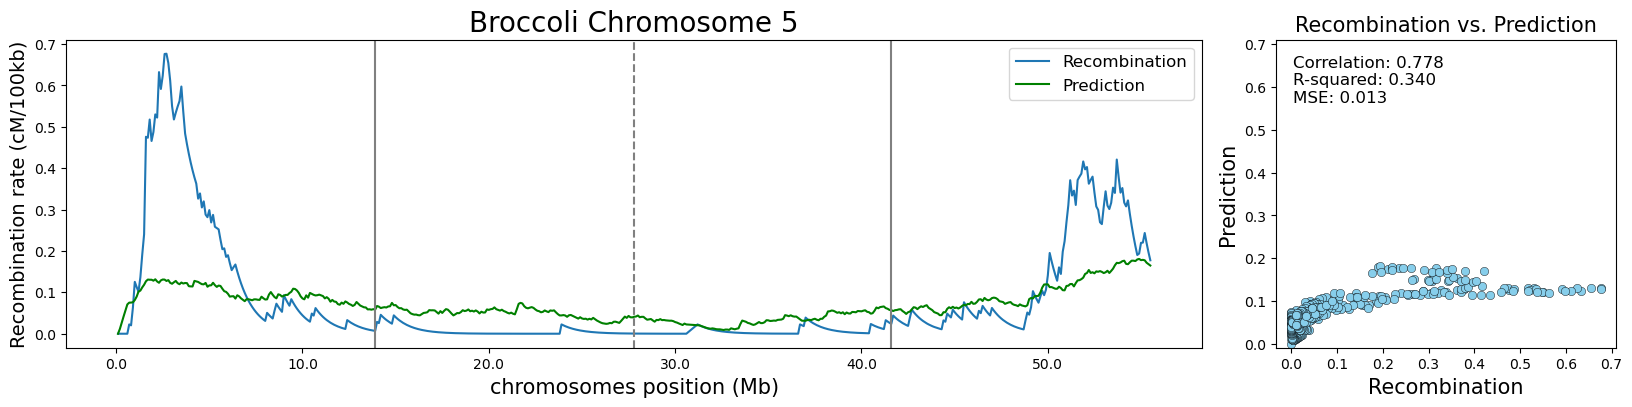

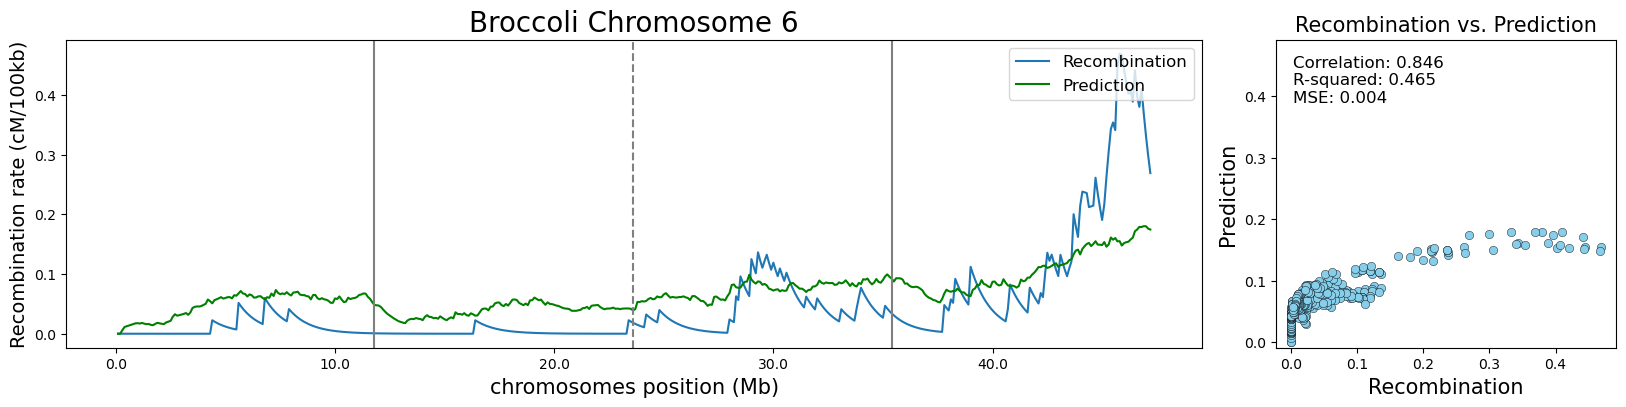

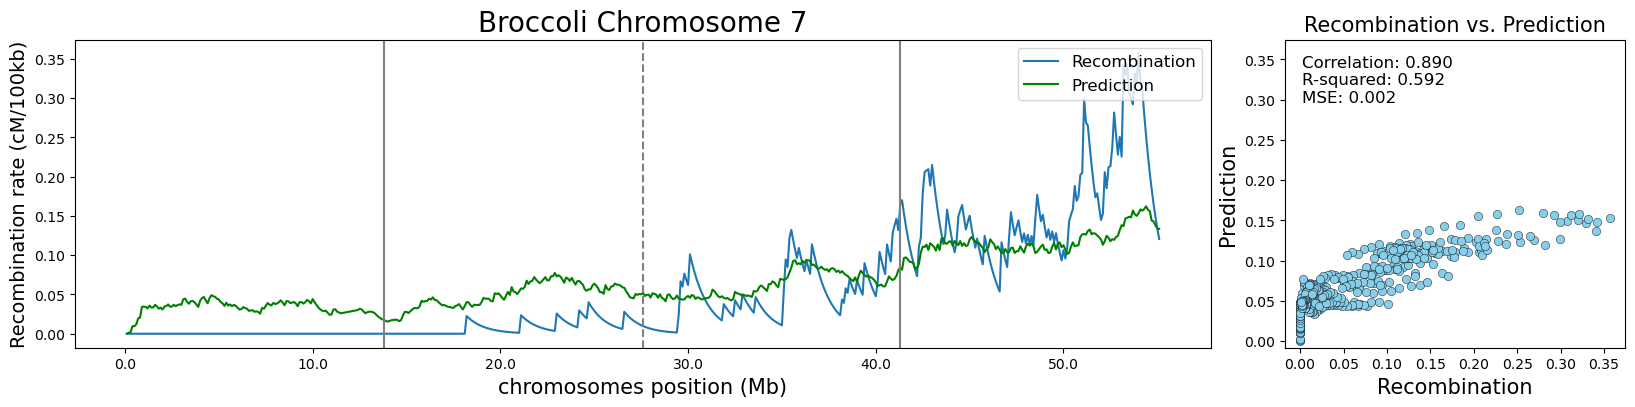

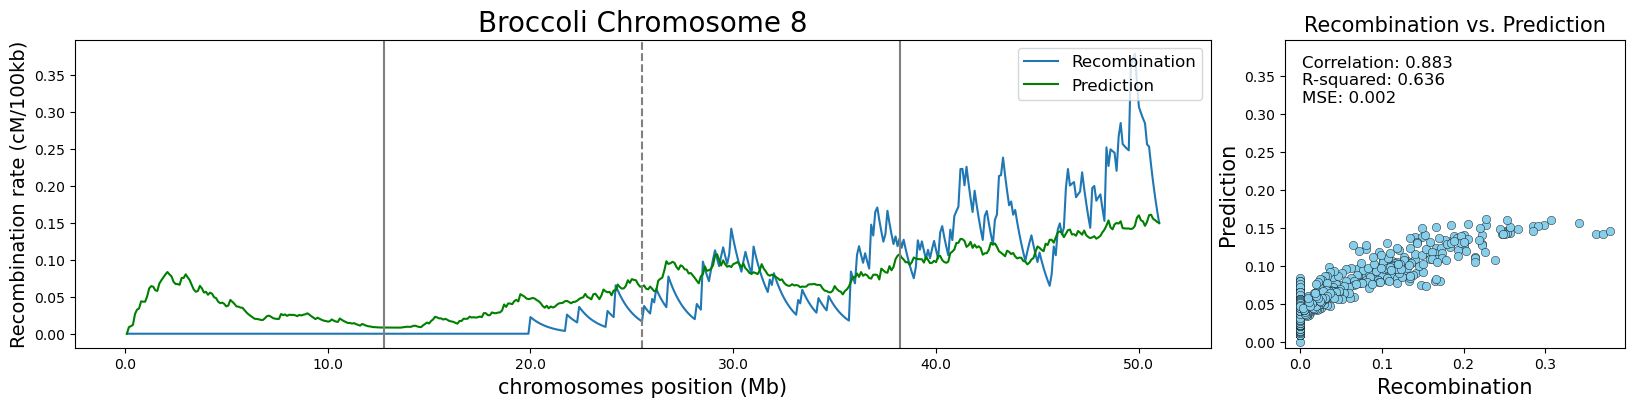

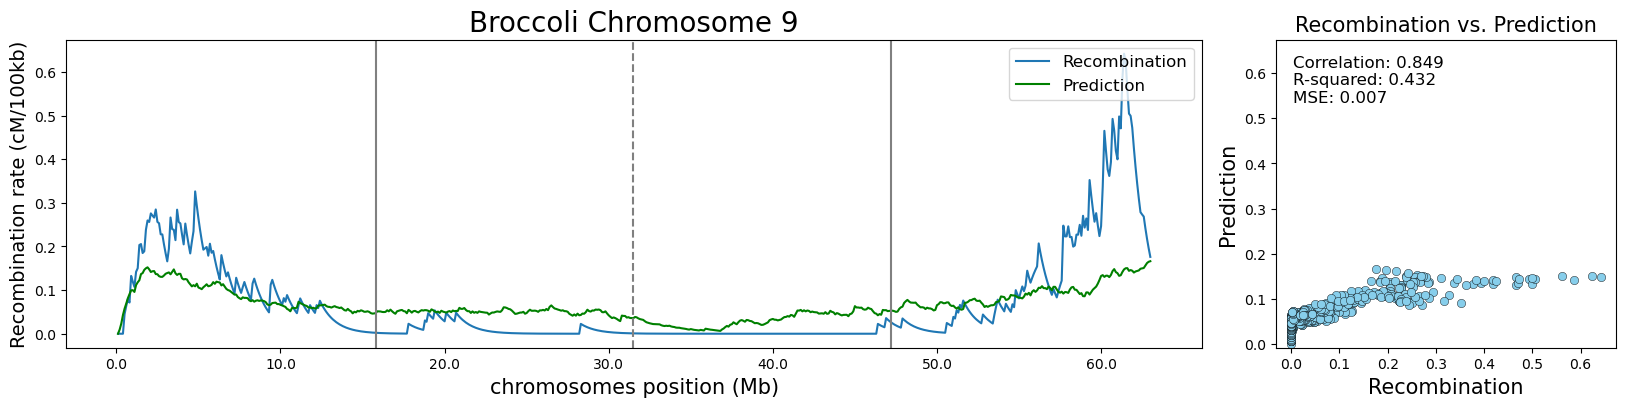

In [17]:
# Predictions and graphs for all chromosomes
for chr_number in range(1, 10):
    plot_chromosome_results(chr_number)
    plt.show()

# Data compilation

In [18]:
corr = pd.DataFrame({'corr':[corr_chr1, corr_chr2, corr_chr3, corr_chr4, corr_chr5, corr_chr6,corr_chr7,corr_chr8,corr_chr9,]})
r2 = pd.DataFrame({'R^2':[r2_chr1, r2_chr2, r2_chr3, r2_chr4, r2_chr5, r2_chr6, r2_chr7, r2_chr8, r2_chr9]})
mse = pd.DataFrame({'MSE':[mse_chr1, mse_chr2, mse_chr3, mse_chr4, mse_chr5, mse_chr6, mse_chr7, mse_chr8, mse_chr9]})
index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9',]})
b_table = pd.concat([index, corr, r2, mse], axis=1)
b_table

chr      corr       R^2       MSE
0  chr1  0.808142  0.419893  0.006988
1  chr2  0.829555  0.484817  0.003693
2  chr3  0.681731  0.452353  0.002232
3  chr4  0.813173  0.513889  0.003982
4  chr5  0.777983  0.340044  0.013259
5  chr6  0.846420  0.464691  0.003984
6  chr7  0.890400  0.591890  0.002358
7  chr8  0.883062  0.635986  0.002275
8  chr9  0.848721  0.431620  0.006912

Correlation between model predictions and recombination rates by quartiles

In [19]:
corr_q1 = pd.DataFrame({'Q1':[corr_q1_chr1,corr_q1_chr2,corr_q1_chr3,corr_q1_chr4,corr_q1_chr5,corr_q1_chr6,corr_q1_chr7,corr_q1_chr8,corr_q1_chr9]})
corr_q2 = pd.DataFrame({'Q2':[corr_q2_chr1,corr_q2_chr2,corr_q2_chr3,corr_q2_chr4,corr_q2_chr5,corr_q2_chr6,corr_q2_chr7,corr_q2_chr8,corr_q2_chr9]})
corr_q3 = pd.DataFrame({'Q3':[corr_q3_chr1,corr_q3_chr2,corr_q3_chr3,corr_q3_chr4,corr_q3_chr5,corr_q3_chr6,corr_q3_chr7,corr_q3_chr8,corr_q3_chr9]})
corr_q4 = pd.DataFrame({'Q4':[corr_q4_chr1,corr_q4_chr2,corr_q4_chr3,corr_q4_chr4,corr_q4_chr5,corr_q4_chr6,corr_q4_chr7,corr_q4_chr8,corr_q4_chr9]})

index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9']})
q_corr = pd.concat([index, corr_q1, corr_q2, corr_q3, corr_q4], axis=1)
q_corr_styled = q_corr.style.background_gradient(cmap="PRGn", vmin=-1, vmax=1)
q_corr_styled.set_table_styles([{'selector': 'th',
                                'props': [('text-align', 'center')]}])
q_corr_styled 

# KOHLRABI GENOME

# Data exploration

In [20]:
df = ko

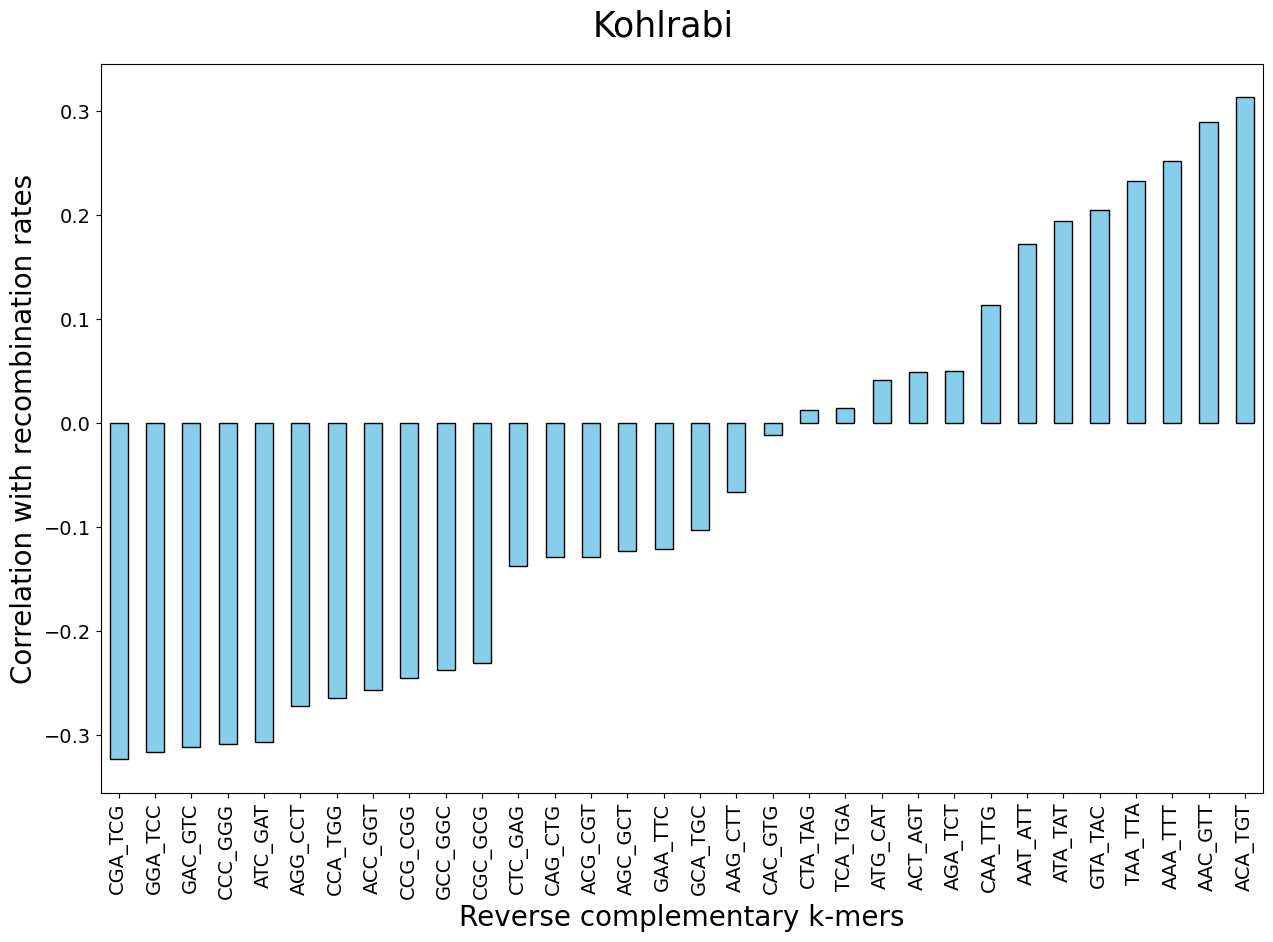

In [21]:
df_stats = df.drop(['cross', 'reference','chr','start','end'],  axis=1)
df_stats_corr = df_stats.corr()['srec'].sort_values(ascending = True)
df_corr = df_stats.corr()
df_corr = df_corr.iloc[1:, :]
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(111)
df_corr['srec'].sort_values(ascending = True).plot(kind = 'bar', color='skyblue', edgecolor='black')
ax.set_xlabel('Reverse complementary k-mers', fontsize=20)
ax.set_ylabel('Correlation with recombination rates', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.suptitle('Kohlrabi', fontsize=25)
plt.subplots_adjust(top=0.92)

plt.show()

# Chromosome Split

In [22]:
chr1 = df[df['chr']== 'chr1']
chr2 = df[df['chr']== 'chr2']
chr3 = df[df['chr']== 'chr3']
chr4 = df[df['chr']== 'chr4']
chr5 = df[df['chr']== 'chr5']
chr6 = df[df['chr']== 'chr6']
chr7 = df[df['chr']== 'chr7']
chr8 = df[df['chr']== 'chr8']
chr9 = df[df['chr']== 'chr9']

In [23]:
achr1 = df[df['chr']!= 'chr1']
achr2 = df[df['chr']!= 'chr2']
achr3 = df[df['chr']!= 'chr3']
achr4 = df[df['chr']!= 'chr4']
achr5 = df[df['chr']!= 'chr5']
achr6 = df[df['chr']!= 'chr6']
achr7 = df[df['chr']!= 'chr7']
achr8 = df[df['chr']!= 'chr8']
achr9 = df[df['chr']!= 'chr9']

# Function to train models and make graphs

The model is trained with the information of all chromosomes except the information of the chromosome to be predicted.

In [24]:
def plot_chromosome_results(chr_number):
    # Replace  with 'chr{chr_number}' 
    chromosomes_data = globals()[f'achr{chr_number}']
    chr_data = globals()[f'chr{chr_number}']

    # TRAINING MODEL
    X_train = chromosomes_data.drop(['cross', 'reference','chr','start','end','srec'], axis=1)
    y_train = chromosomes_data[['srec']]
    
    model.fit(X_train, y_train)
    model_preds = model.predict(chr_data.drop(['cross', 'reference','chr','start','end','srec'], axis=1))
    
    #SMOOTHING
    model_spreds= np.zeros(len(model_preds))

    for i in  range(1, len(model_preds)): 
        model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9
        
    #CORRELATIONS BY QUARTILES
    c_q1 = int(len(chr_data)*0.25)
    c_q2 = int(len(chr_data)*0.50)
    c_q3 = int(len(chr_data)*0.75)
    
    rq1 = chr_data['srec'].iloc[0:c_q1]
    rq2 = chr_data['srec'].iloc[c_q1:c_q2]
    rq3 = chr_data['srec'].iloc[c_q2:c_q3]
    rq4 = chr_data['srec'].iloc[c_q3:int(len(chr_data))]

    pq1 = model_spreds[0:c_q1]
    pq2 = model_spreds[c_q1:c_q2]
    pq3 = model_spreds[c_q2:c_q3]
    pq4 = model_spreds[c_q3:int(len(chr_data))]

    corr_q1 = np.corrcoef(rq1, pq1)[0, 1]
    corr_q2 = np.corrcoef(rq2, pq2)[0, 1]
    corr_q3 = np.corrcoef(rq3, pq3)[0, 1]
    corr_q4 = np.corrcoef(rq4, pq4)[0, 1]
    
    globals()[f'corr_q1_chr{chr_number}'] = corr_q1
    globals()[f'corr_q2_chr{chr_number}'] = corr_q2
    globals()[f'corr_q3_chr{chr_number}'] = corr_q3
    globals()[f'corr_q4_chr{chr_number}'] = corr_q4
     
    # PLOTTING RESULTS
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4), gridspec_kw={'width_ratios': [10, 3]})

    # Line plot and correlation plot
    ax1.plot(chr_data.end, chr_data.srec, label='Recombination')
    ax1.plot(chr_data.end, model_spreds, label='Prediction', color='green')
    ax1.set_title(f'Kohlrabi Chromosome {chr_number}', fontsize=20)
    ax1.set_xlabel('chromosomes position (Mb)', fontsize=15)
    ax1.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
    ax1.legend(loc='upper right', fontsize=12)
    ticks = ax1.get_xticks() / 1000000
    ax1.set_xticklabels(ticks)
        
    chr_len = chr_data["end"].iloc[-1]
    q1 =round(chr_len * 0.25 / 100000) * 100000
    q2 =round(chr_len* 0.50 / 100000) * 100000
    q3 =round(chr_len * 0.75 / 100000) * 100000

    ax1.axvline(x=q1, color='gray', linestyle='-')
    ax1.axvline(x=q2, color='gray', linestyle='--')
    ax1.axvline(x=q3, color='gray', linestyle='-')

    # Scatter plot
    scatter = ax2.scatter(chr_data.srec, model_spreds, c='skyblue', edgecolors='black', linewidth= 0.3)
    ax2.set_title('Recombination vs. Prediction', fontsize=15)
    ax2.set_xlabel('Recombination', fontsize=15)
    ax2.set_ylabel('Prediction', fontsize=15)

    # Calculate correlation coefficient, coefficient of determination, and Mean Squared Error
    corr_chr = np.corrcoef(chr_data.srec, model_spreds)[0, 1]
    r2_chr = r2_score(chr_data.srec, model_spreds)
    mse_chr = mean_squared_error(chr_data.srec, model_spreds)

    # Calculate the aspect ratio based on the plot heights
    h1 = ax1.get_ylim()
    h2 = ax2.get_ylim()
    aspect_ratio = max(h1[1] - h1[0], h2[1] - h2[0]) / (max(h1[1], h2[1]) - min(h1[0], h2[0]))

    # Set the aspect ratio for the scatter plot only if it doesn't distort the square shape
    if aspect_ratio < 1:
        ax2.set_aspect('equal')

    # Display correlation coefficient, coefficient of determination, and Mean Squared Error as plain text
    globals()[f'corr_chr{chr_number}'] = corr_chr
    globals()[f'r2_chr{chr_number}'] = r2_chr
    globals()[f'mse_chr{chr_number}'] = mse_chr

    textstr = f'Correlation: {corr_chr:.3f}\nR-squared: {r2_chr:.3f}\nMSE: {mse_chr:.3f}'
    ax2.text(0.05, 0.95, textstr, transform=ax2.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

    # Adjustments to align the heights of the two plots
    max_height = max(h1[1], h2[1])
    ax1.set_ylim([h1[0], max_height])
    ax2.set_ylim([h2[0], max_height])

    # Reduce the separation between the plots
    plt.subplots_adjust(wspace=0.1)
    plt.show()

# Model Predictions

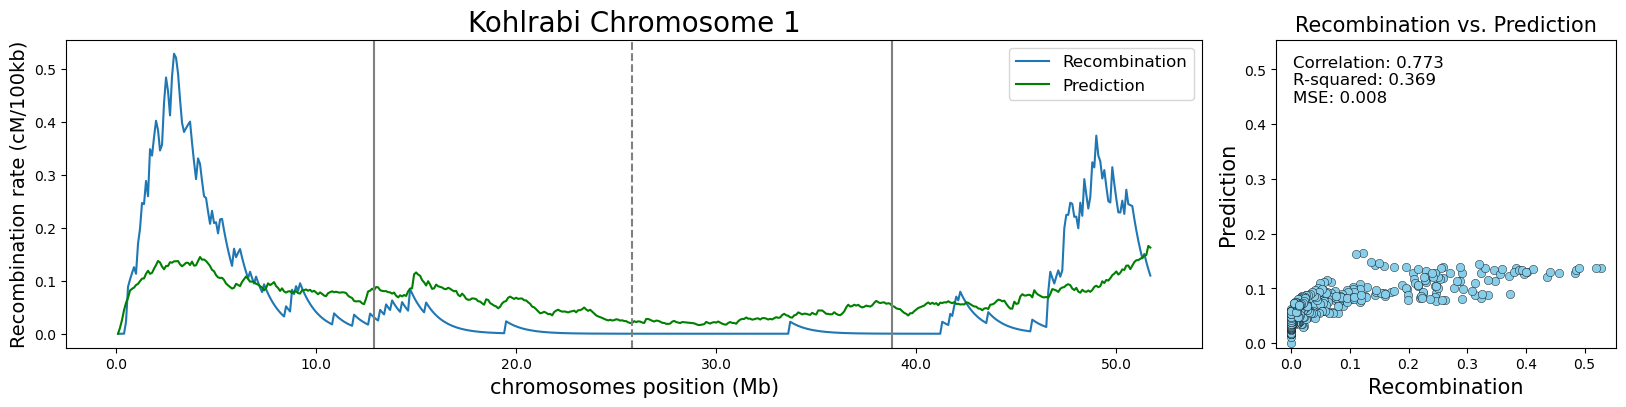

In [25]:
# For one chromosome, example Chromosome 1
plot_chromosome_results(1)

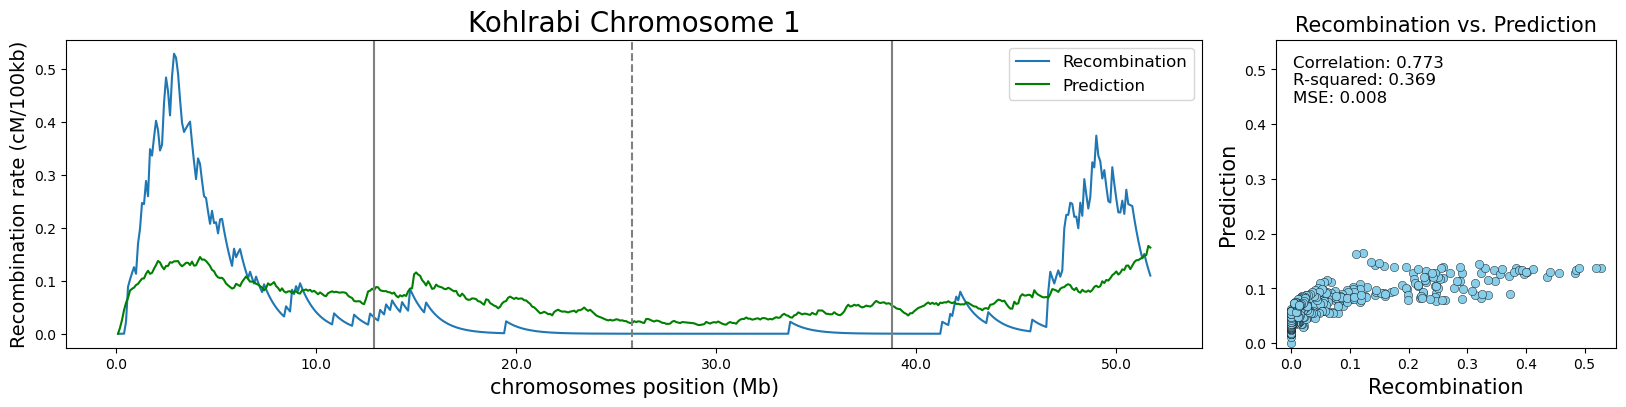

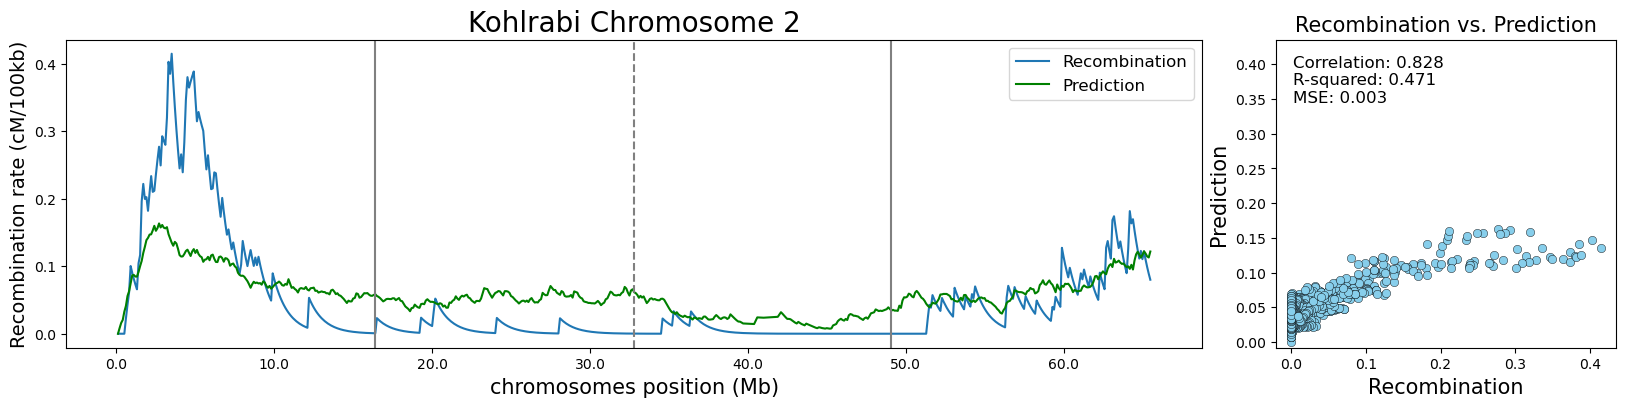

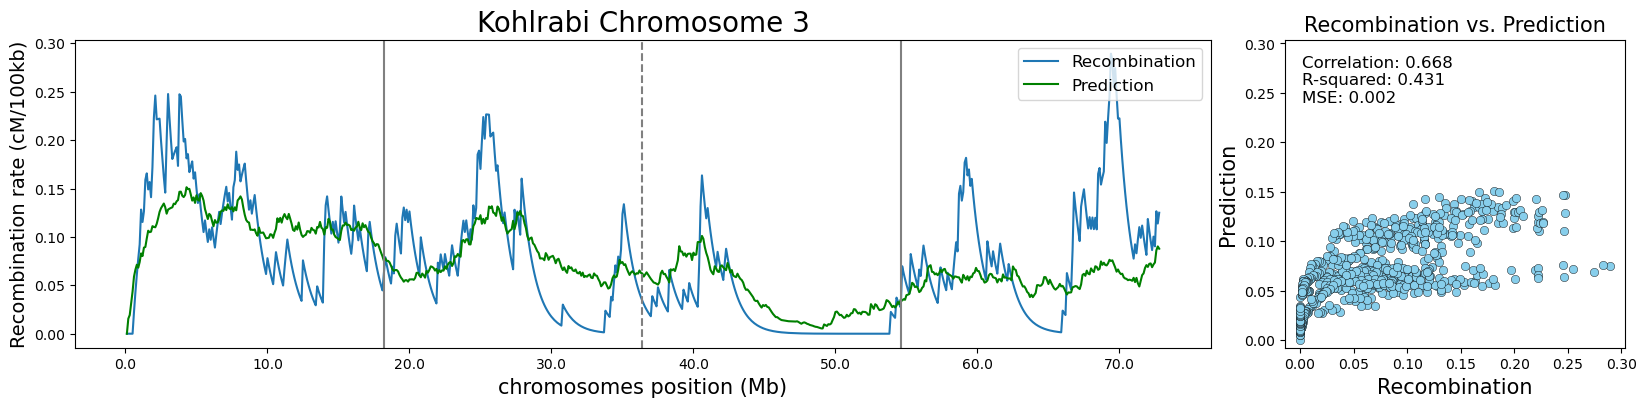

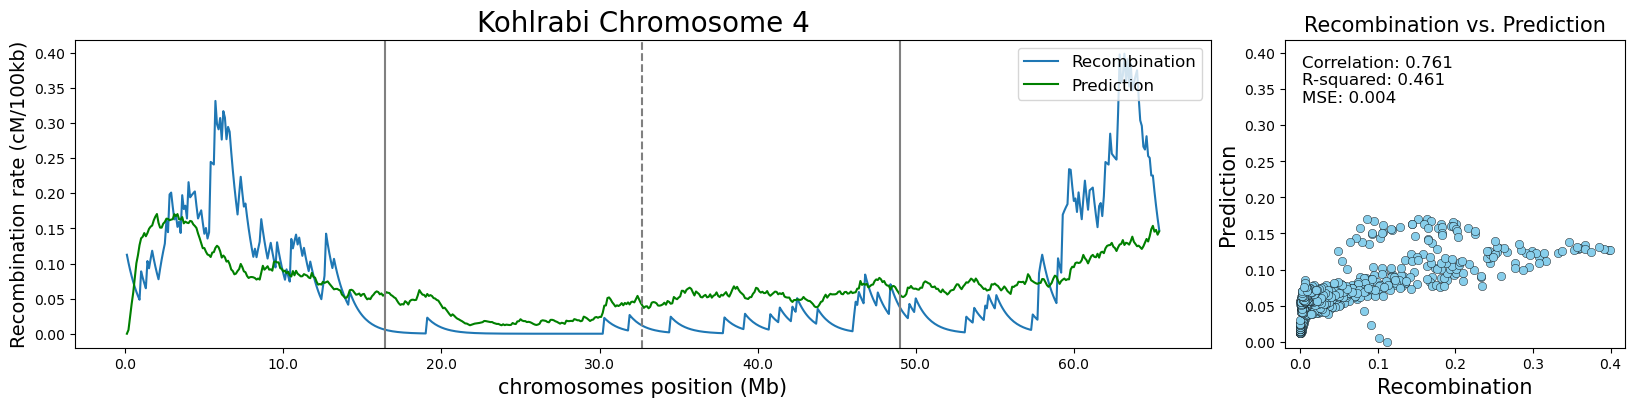

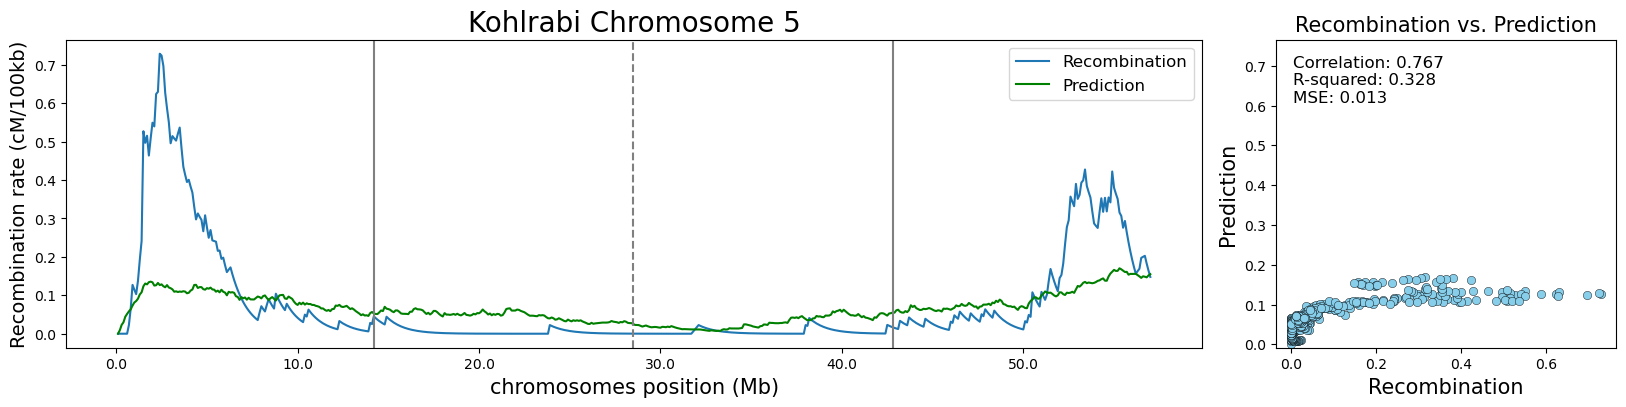

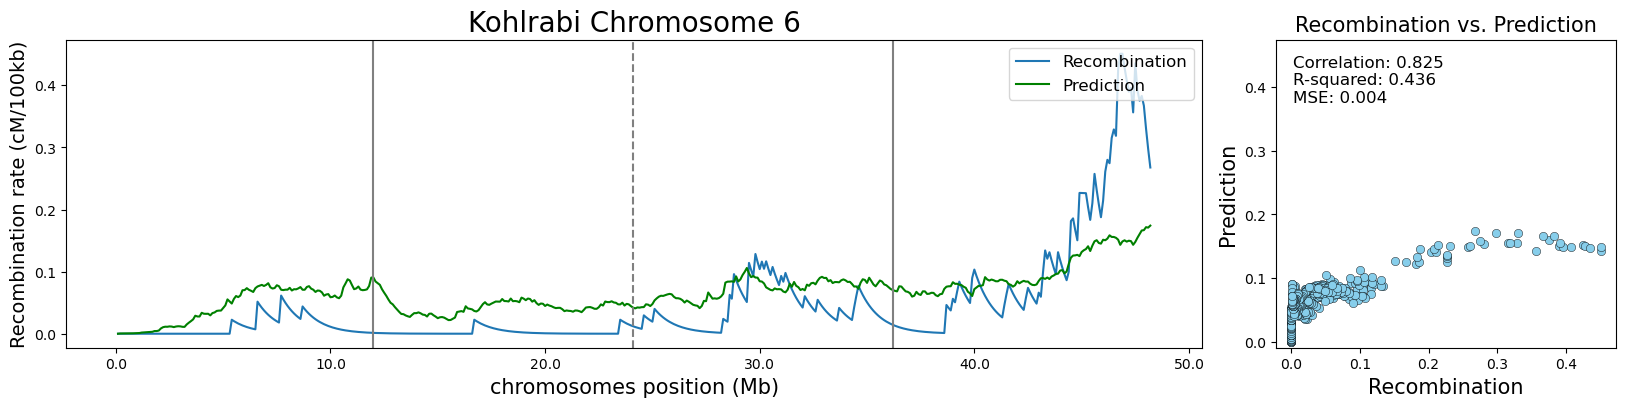

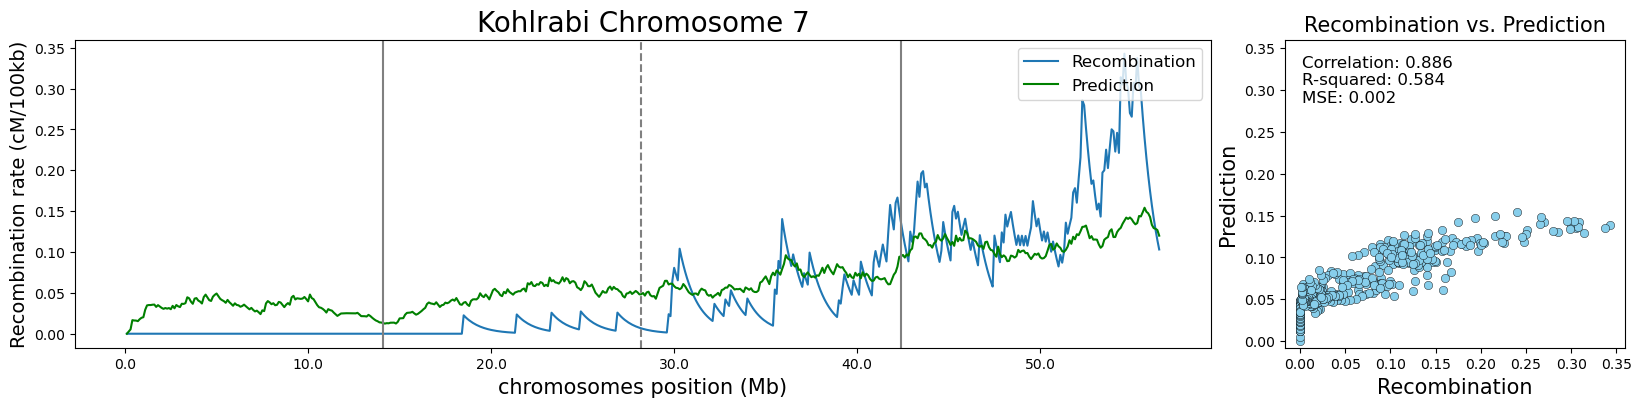

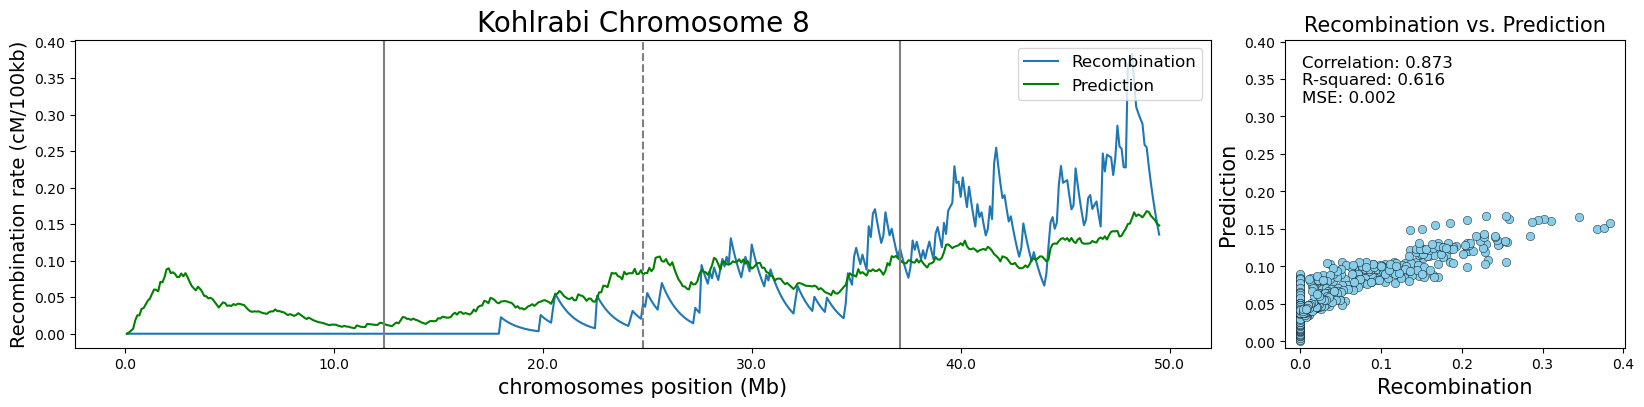

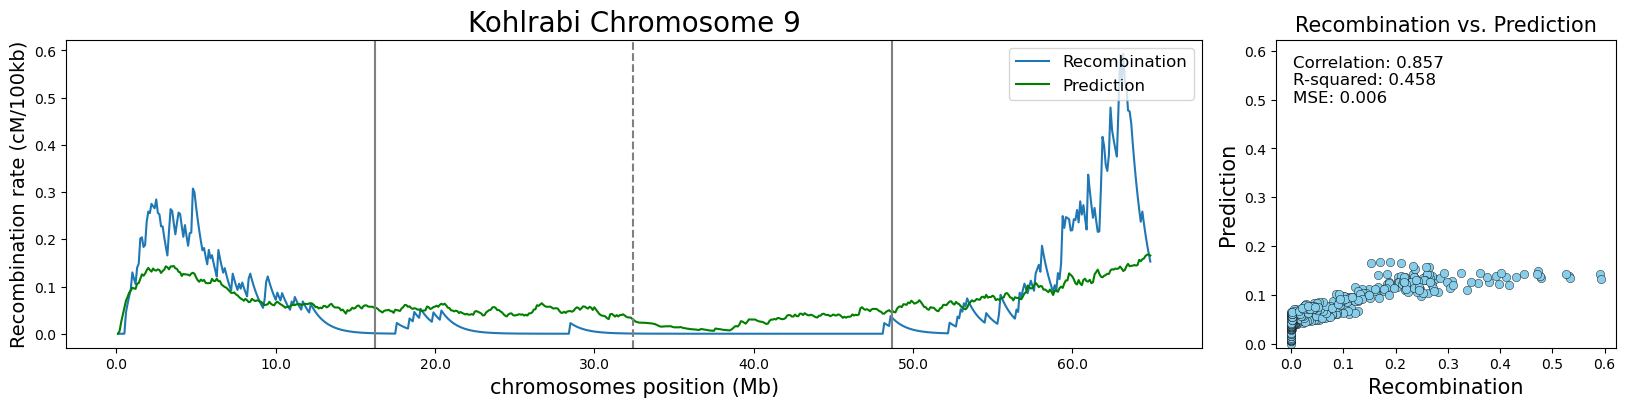

In [26]:
# Predictions and graphs for all chromosomes
for chr_number in range(1, 10):
    plot_chromosome_results(chr_number)
    plt.show()

# Data compilation

In [27]:
corr = pd.DataFrame({'corr':[corr_chr1, corr_chr2, corr_chr3, corr_chr4, corr_chr5, corr_chr6,corr_chr7,corr_chr8,corr_chr9,]})
r2 = pd.DataFrame({'R^2':[r2_chr1, r2_chr2, r2_chr3, r2_chr4, r2_chr5, r2_chr6, r2_chr7, r2_chr8, r2_chr9]})
mse = pd.DataFrame({'MSE':[mse_chr1, mse_chr2, mse_chr3, mse_chr4, mse_chr5, mse_chr6, mse_chr7, mse_chr8, mse_chr9]})
index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9',]})
ko_table = pd.concat([index, corr, r2, mse], axis=1)
ko_table

chr      corr       R^2       MSE
0  chr1  0.772746  0.369209  0.007694
1  chr2  0.827732  0.471023  0.003412
2  chr3  0.667977  0.430852  0.002124
3  chr4  0.760656  0.460600  0.004130
4  chr5  0.766792  0.328096  0.013166
5  chr6  0.824647  0.436193  0.003954
6  chr7  0.885935  0.583676  0.002216
7  chr8  0.872972  0.616009  0.002430
8  chr9  0.856542  0.458445  0.006166

Correlation between model predictions and recombination rates by quartiles

In [28]:
corr_q1 = pd.DataFrame({'Q1':[corr_q1_chr1,corr_q1_chr2,corr_q1_chr3,corr_q1_chr4,corr_q1_chr5,corr_q1_chr6,corr_q1_chr7,corr_q1_chr8,corr_q1_chr9]})
corr_q2 = pd.DataFrame({'Q2':[corr_q2_chr1,corr_q2_chr2,corr_q2_chr3,corr_q2_chr4,corr_q2_chr5,corr_q2_chr6,corr_q2_chr7,corr_q2_chr8,corr_q2_chr9]})
corr_q3 = pd.DataFrame({'Q3':[corr_q3_chr1,corr_q3_chr2,corr_q3_chr3,corr_q3_chr4,corr_q3_chr5,corr_q3_chr6,corr_q3_chr7,corr_q3_chr8,corr_q3_chr9]})
corr_q4 = pd.DataFrame({'Q4':[corr_q4_chr1,corr_q4_chr2,corr_q4_chr3,corr_q4_chr4,corr_q4_chr5,corr_q4_chr6,corr_q4_chr7,corr_q4_chr8,corr_q4_chr9]})

index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9']})
q_corr = pd.concat([index, corr_q1, corr_q2, corr_q3, corr_q4], axis=1)
q_corr_styled = q_corr.style.background_gradient(cmap="PRGn", vmin=-1, vmax=1)
q_corr_styled.set_table_styles([{'selector': 'th',
                                'props': [('text-align', 'center')]}])
q_corr_styled 

# Prediction performance of models trained with Broccoli data and Kohlrabi data.

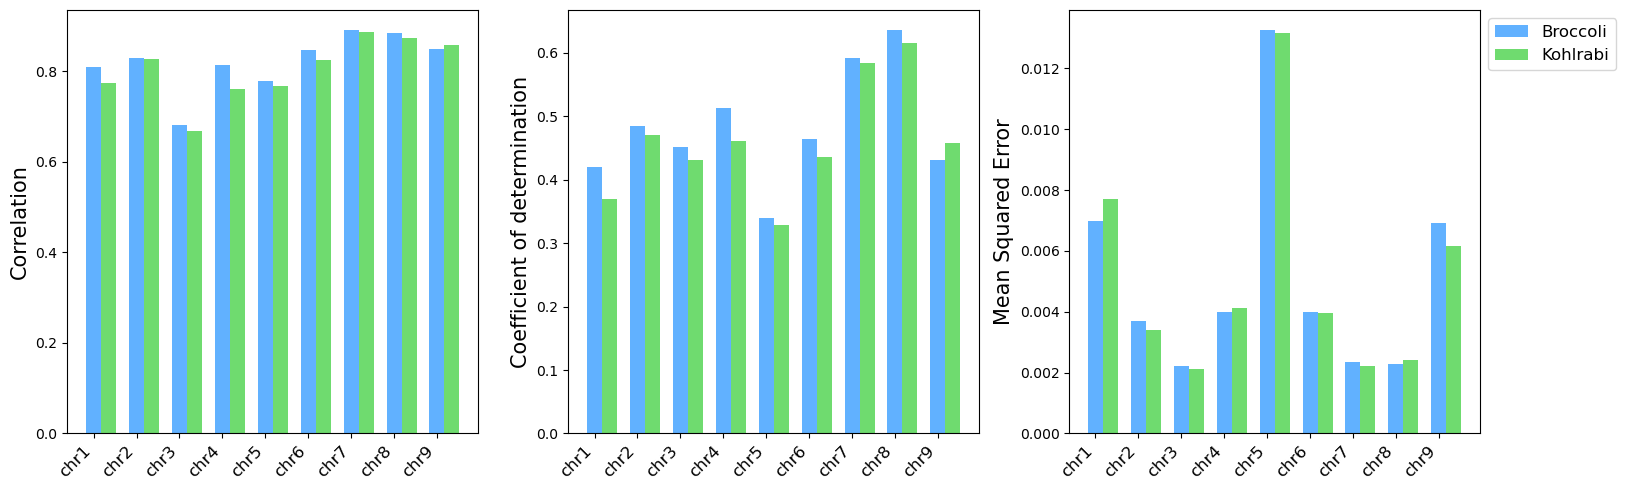

In [30]:
# Adjusting bar width
bar_width = 0.35

# Creating data positions
bar_positions_b = np.arange(len(b_table['chr']))
bar_positions_ko = bar_positions_b + bar_width

# Creating subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# First chart
axs[0].bar(bar_positions_b, b_table['corr'], color='dodgerblue', width=bar_width, label='Broccoli', alpha=0.7)
axs[0].bar(bar_positions_ko, ko_table['corr'], color='limegreen', width=bar_width, label='Kohlrabi', alpha=0.7)

axs[0].set_ylabel('Correlation', fontsize=15)

# Second chart
axs[1].bar(bar_positions_b, b_table['R^2'], color='dodgerblue', width=bar_width, label='Broccoli', alpha=0.7)
axs[1].bar(bar_positions_ko, ko_table['R^2'], color='limegreen', width=bar_width, label='Kohlrabi', alpha=0.7)

axs[1].set_ylabel('Coefficient of determination', fontsize=15)

# Third chart
axs[2].bar(bar_positions_b, b_table['MSE'], color='dodgerblue', width=bar_width, label='Broccoli', alpha=0.7)
axs[2].bar(bar_positions_ko, ko_table['MSE'], color='limegreen', width=bar_width, label='Kohlrabi', alpha=0.7)

axs[2].set_ylabel('Mean Squared Error', fontsize=15)

# Get chromosome labels from the 'chr' column
chr_labels = ko_table['chr']

# Set x-axis labels for all three subplots
for ax in axs:
    ax.set_xticks(bar_positions_b)
    ax.set_xticklabels(chr_labels)

# Rotate labels for better readability
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Adjusting layout
plt.tight_layout()

# Place legend outside the subplots and above the last subplot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Show the figure
plt.show()

# Model trained with all Broccoli chromosomes to predict recombination on each Kohlrabi chromosome

In [31]:
# TRAINING MODEL with Broccoli data
X_train = b.drop(['cross', 'reference','chr','start','end','srec'], axis=1)
y_train = b[['srec']]

model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=1)

In [32]:
# Objects with Kohlrabi data per chromosome
chr1 = ko[ko['chr']== 'chr1']
chr2 = ko[ko['chr']== 'chr2']
chr3 = ko[ko['chr']== 'chr3']
chr4 = ko[ko['chr']== 'chr4']
chr5 = ko[ko['chr']== 'chr5']
chr6 = ko[ko['chr']== 'chr6']
chr7 = ko[ko['chr']== 'chr7']
chr8 = ko[ko['chr']== 'chr8']
chr9 = ko[ko['chr']== 'chr9']

In [33]:
def plot_chromosome_results(chr_number):
    # Replace  with 'chr{chr_number}' 
    chromosomes_data = globals()[f'achr{chr_number}']
    chr_data = globals()[f'chr{chr_number}']

    # MODEL PREDICTIONS
    model_preds = model.predict(chr_data.drop(['cross', 'reference','chr','start','end','srec'], axis=1))
    
    #SMOOTHING
    model_spreds= np.zeros(len(model_preds))

    for i in  range(1, len(model_preds)): 
        model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9
        
    #CORRELATIONS BY QUARTILES
    c_q1 = int(len(chr_data)*0.25)
    c_q2 = int(len(chr_data)*0.50)
    c_q3 = int(len(chr_data)*0.75)
    
    rq1 = chr_data['srec'].iloc[0:c_q1]
    rq2 = chr_data['srec'].iloc[c_q1:c_q2]
    rq3 = chr_data['srec'].iloc[c_q2:c_q3]
    rq4 = chr_data['srec'].iloc[c_q3:int(len(chr_data))]

    pq1 = model_spreds[0:c_q1]
    pq2 = model_spreds[c_q1:c_q2]
    pq3 = model_spreds[c_q2:c_q3]
    pq4 = model_spreds[c_q3:int(len(chr_data))]

    corr_q1 = np.corrcoef(rq1, pq1)[0, 1]
    corr_q2 = np.corrcoef(rq2, pq2)[0, 1]
    corr_q3 = np.corrcoef(rq3, pq3)[0, 1]
    corr_q4 = np.corrcoef(rq4, pq4)[0, 1]
    
    globals()[f'corr_q1_chr{chr_number}'] = corr_q1
    globals()[f'corr_q2_chr{chr_number}'] = corr_q2
    globals()[f'corr_q3_chr{chr_number}'] = corr_q3
    globals()[f'corr_q4_chr{chr_number}'] = corr_q4
     
    # PLOTTING RESULTS
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4), gridspec_kw={'width_ratios': [10, 3]})

    # Line plot and correlation plot
    ax1.plot(chr_data.end, chr_data.srec, label='Recombination')
    ax1.plot(chr_data.end, model_spreds, label='Prediction', color='green')
    ax1.set_title(f'Kohlrabi Chromosome {chr_number}', fontsize=20)
    ax1.set_xlabel('chromosomes position (Mb)', fontsize=15)
    ax1.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
    ax1.legend(loc='upper right', fontsize=12)
    ticks = ax1.get_xticks() / 1000000
    ax1.set_xticklabels(ticks)
        
    chr_len = chr_data["end"].iloc[-1]
    q1 =round(chr_len * 0.25 / 100000) * 100000
    q2 =round(chr_len* 0.50 / 100000) * 100000
    q3 =round(chr_len * 0.75 / 100000) * 100000

    ax1.axvline(x=q1, color='gray', linestyle='-')
    ax1.axvline(x=q2, color='gray', linestyle='--')
    ax1.axvline(x=q3, color='gray', linestyle='-')

    # Scatter plot
    scatter = ax2.scatter(chr_data.srec, model_spreds, c='skyblue', edgecolors='black', linewidth= 0.3)
    ax2.set_title('Recombination vs. Prediction', fontsize=15)
    ax2.set_xlabel('Recombination', fontsize=15)
    ax2.set_ylabel('Prediction', fontsize=15)

    # Calculate correlation coefficient, coefficient of determination, and Mean Squared Error
    corr_chr = np.corrcoef(chr_data.srec, model_spreds)[0, 1]
    r2_chr = r2_score(chr_data.srec, model_spreds)
    mse_chr = mean_squared_error(chr_data.srec, model_spreds)

    # Calculate the aspect ratio based on the plot heights
    h1 = ax1.get_ylim()
    h2 = ax2.get_ylim()
    aspect_ratio = max(h1[1] - h1[0], h2[1] - h2[0]) / (max(h1[1], h2[1]) - min(h1[0], h2[0]))

    # Set the aspect ratio for the scatter plot only if it doesn't distort the square shape
    if aspect_ratio < 1:
        ax2.set_aspect('equal')

    # Display correlation coefficient, coefficient of determination, and Mean Squared Error as plain text
    globals()[f'corr_chr{chr_number}'] = corr_chr
    globals()[f'r2_chr{chr_number}'] = r2_chr
    globals()[f'mse_chr{chr_number}'] = mse_chr

    textstr = f'Correlation: {corr_chr:.3f}\nR-squared: {r2_chr:.3f}\nMSE: {mse_chr:.3f}'
    ax2.text(0.05, 0.95, textstr, transform=ax2.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

    # Adjustments to align the heights of the two plots
    max_height = max(h1[1], h2[1])
    ax1.set_ylim([h1[0], max_height])
    ax2.set_ylim([h2[0], max_height])

    # Reduce the separation between the plots
    plt.subplots_adjust(wspace=0.1)
    plt.show()

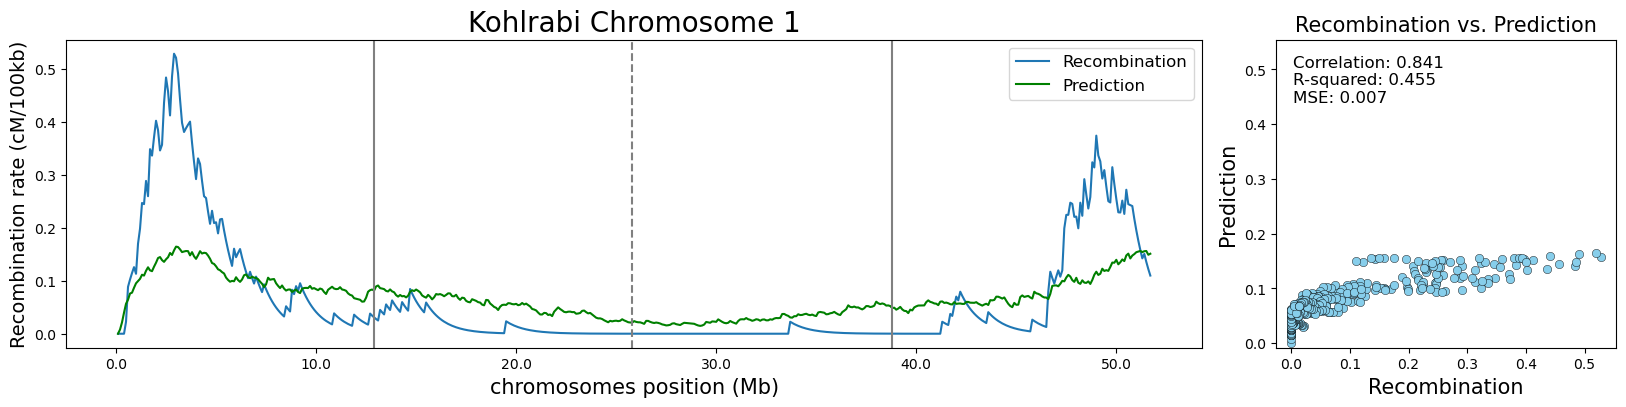

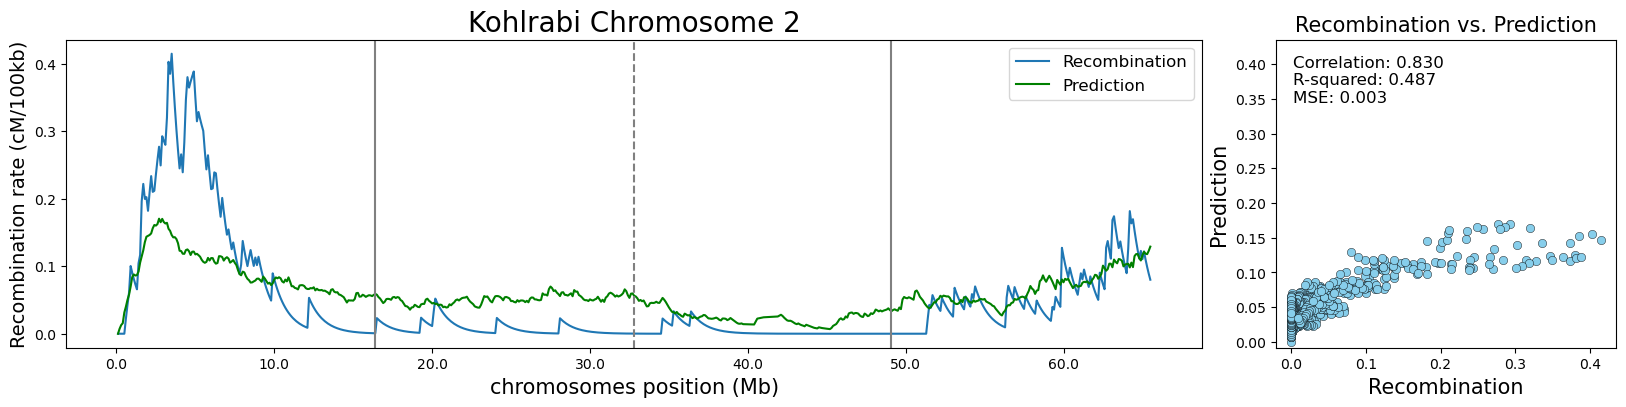

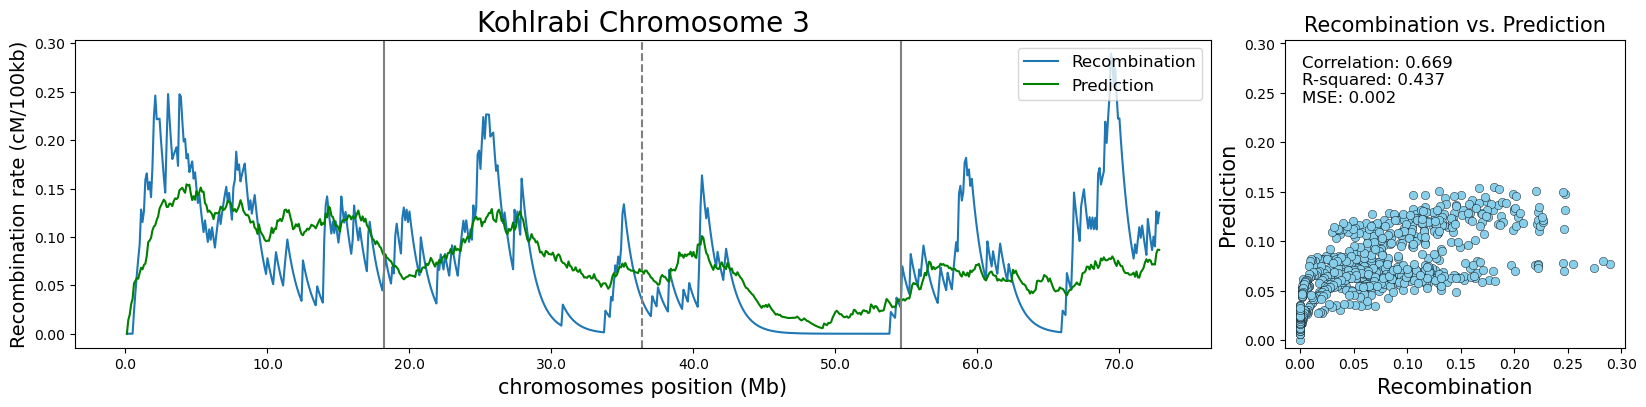

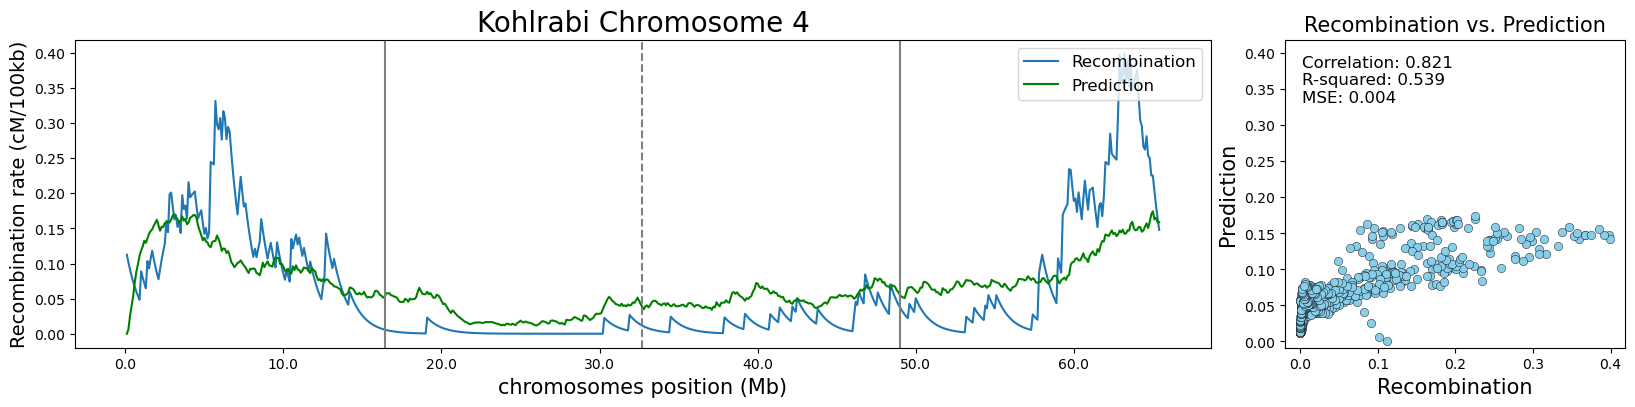

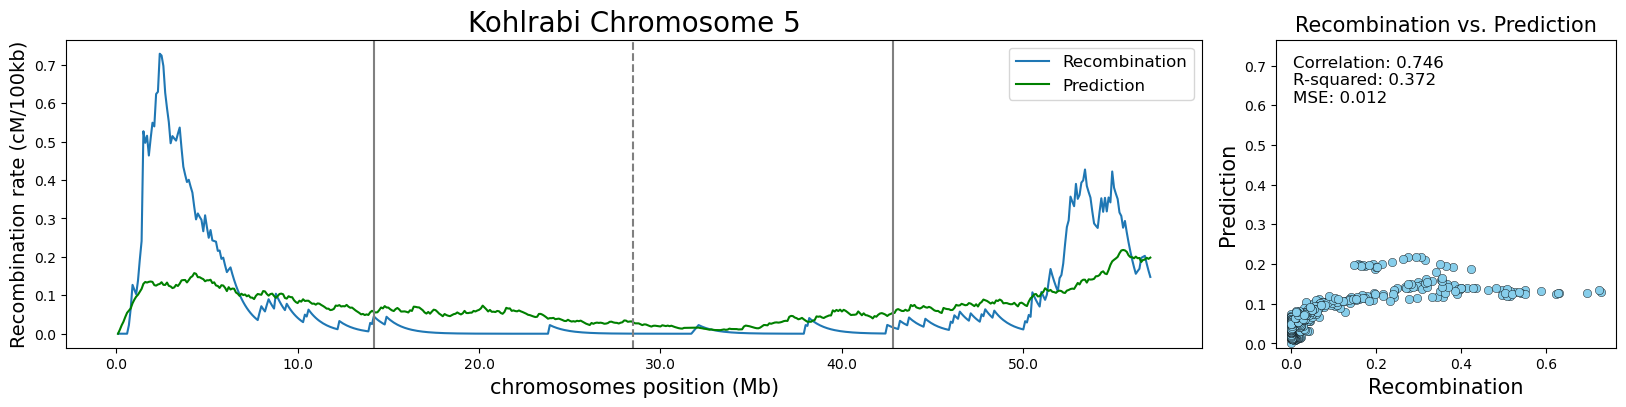

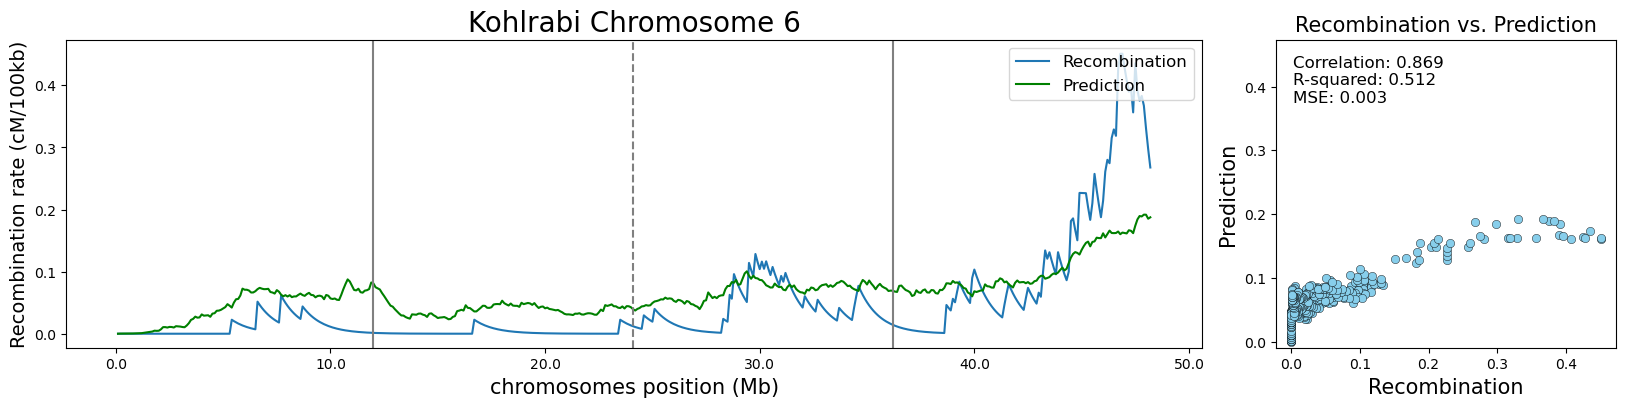

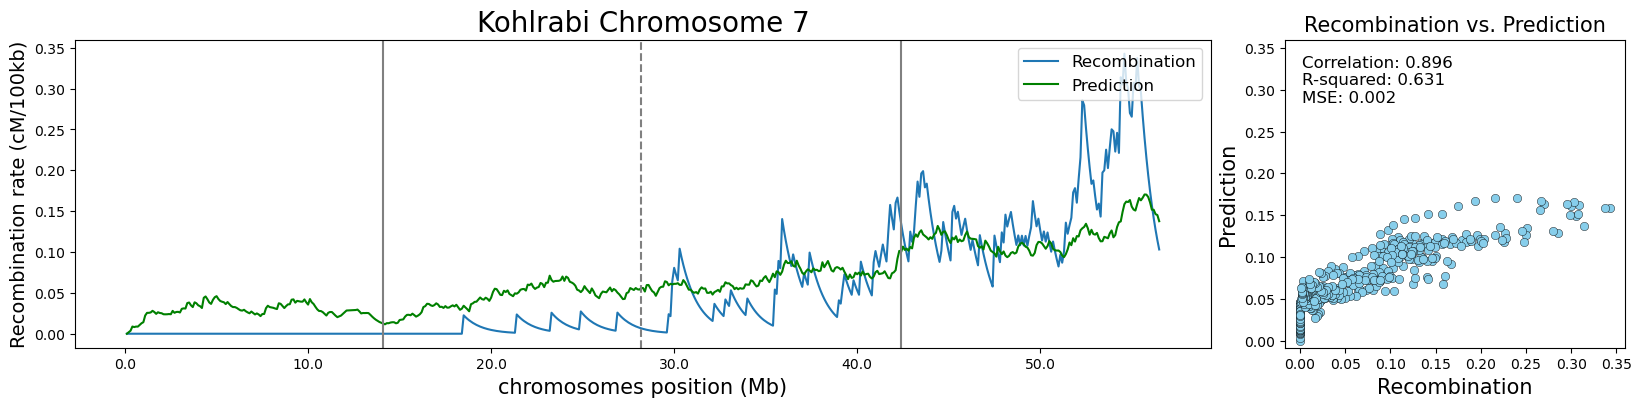

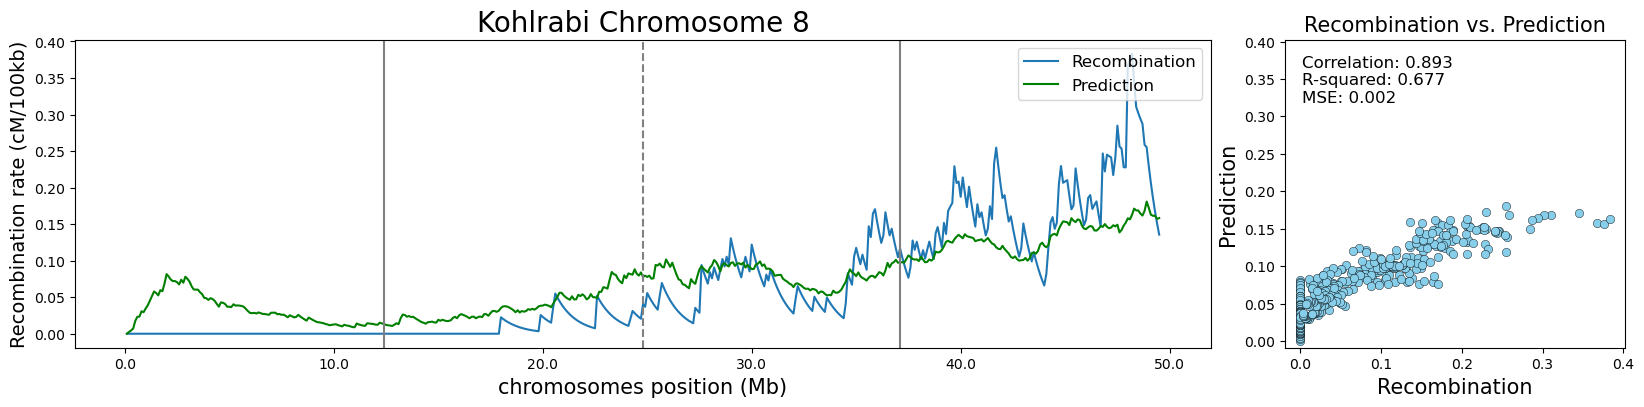

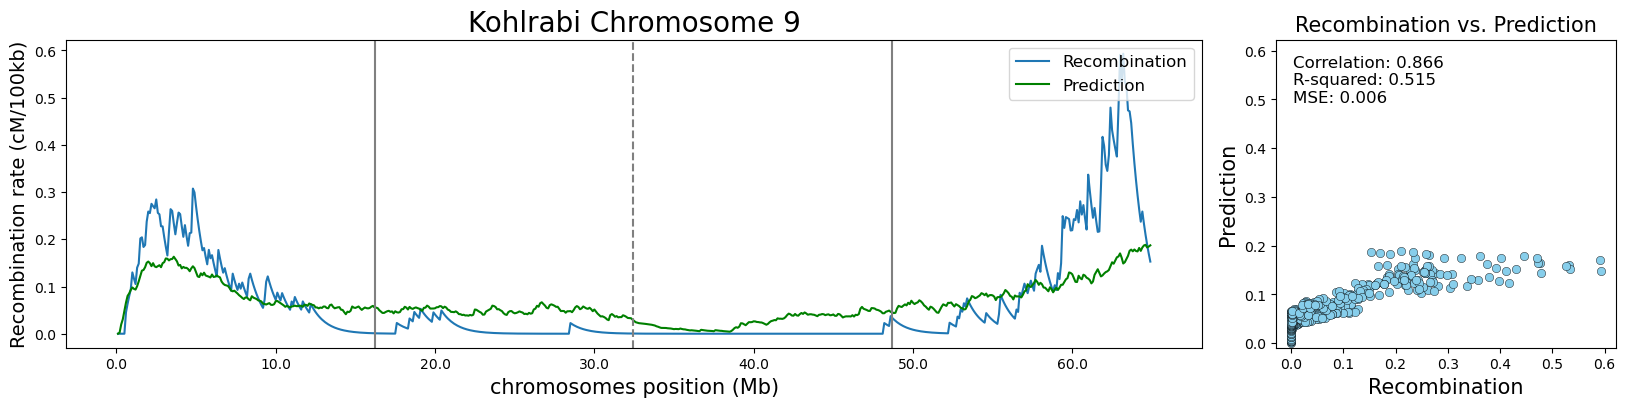

In [34]:
# Predictions and graphs for all chromosomes
for chr_number in range(1, 10):
    plot_chromosome_results(chr_number)
    plt.show()

# Data compilation

In [35]:
corr = pd.DataFrame({'corr':[corr_chr1, corr_chr2, corr_chr3, corr_chr4, corr_chr5, corr_chr6,corr_chr7,corr_chr8,corr_chr9,]})
r2 = pd.DataFrame({'R^2':[r2_chr1, r2_chr2, r2_chr3, r2_chr4, r2_chr5, r2_chr6, r2_chr7, r2_chr8, r2_chr9]})
mse = pd.DataFrame({'MSE':[mse_chr1, mse_chr2, mse_chr3, mse_chr4, mse_chr5, mse_chr6, mse_chr7, mse_chr8, mse_chr9]})
index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9',]})
tb_pko_table = pd.concat([index, corr, r2, mse], axis=1)
tb_pko_table

chr      corr       R^2       MSE
0  chr1  0.841476  0.454796  0.006650
1  chr2  0.829540  0.487244  0.003307
2  chr3  0.669146  0.436521  0.002103
3  chr4  0.821283  0.539041  0.003530
4  chr5  0.746425  0.371869  0.012308
5  chr6  0.868992  0.512363  0.003420
6  chr7  0.895965  0.631226  0.001963
7  chr8  0.893103  0.676712  0.002046
8  chr9  0.866413  0.515235  0.005519

Correlation between model predictions and recombination rates by quartiles

In [36]:
corr_q1 = pd.DataFrame({'Q1':[corr_q1_chr1,corr_q1_chr2,corr_q1_chr3,corr_q1_chr4,corr_q1_chr5,corr_q1_chr6,corr_q1_chr7,corr_q1_chr8,corr_q1_chr9]})
corr_q2 = pd.DataFrame({'Q2':[corr_q2_chr1,corr_q2_chr2,corr_q2_chr3,corr_q2_chr4,corr_q2_chr5,corr_q2_chr6,corr_q2_chr7,corr_q2_chr8,corr_q2_chr9]})
corr_q3 = pd.DataFrame({'Q3':[corr_q3_chr1,corr_q3_chr2,corr_q3_chr3,corr_q3_chr4,corr_q3_chr5,corr_q3_chr6,corr_q3_chr7,corr_q3_chr8,corr_q3_chr9]})
corr_q4 = pd.DataFrame({'Q4':[corr_q4_chr1,corr_q4_chr2,corr_q4_chr3,corr_q4_chr4,corr_q4_chr5,corr_q4_chr6,corr_q4_chr7,corr_q4_chr8,corr_q4_chr9]})

index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9']})
q_corr = pd.concat([index, corr_q1, corr_q2, corr_q3, corr_q4], axis=1)
q_corr_styled = q_corr.style.background_gradient(cmap="PRGn", vmin=-1, vmax=1)
q_corr_styled.set_table_styles([{'selector': 'th',
                                'props': [('text-align', 'center')]}])
q_corr_styled 

# Model trained with all Kohlrabi chromosomes to predict recombination on each Broccoli chromosome

In [37]:
# TRAINING MODEL with Kohlrabi data
X_train = ko.drop(['cross', 'reference','chr','start','end','srec'], axis=1)
y_train = ko[['srec']]

model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=1)

In [38]:
# Objects with Broccoli data per chromosome
chr1 = b[b['chr']== 'chr1']
chr2 = b[b['chr']== 'chr2']
chr3 = b[b['chr']== 'chr3']
chr4 = b[b['chr']== 'chr4']
chr5 = b[b['chr']== 'chr5']
chr6 = b[b['chr']== 'chr6']
chr7 = b[b['chr']== 'chr7']
chr8 = b[b['chr']== 'chr8']
chr9 = b[b['chr']== 'chr9']

In [39]:
def plot_chromosome_results(chr_number):
    # Replace  with 'chr{chr_number}' 
    chromosomes_data = globals()[f'achr{chr_number}']
    chr_data = globals()[f'chr{chr_number}']

    # MODEL PREDICTIONS
    model_preds = model.predict(chr_data.drop(['cross', 'reference','chr','start','end','srec'], axis=1))
    
    #SMOOTHING
    model_spreds= np.zeros(len(model_preds))

    for i in  range(1, len(model_preds)): 
        model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9
        
    #CORRELATIONS BY QUARTILES
    c_q1 = int(len(chr_data)*0.25)
    c_q2 = int(len(chr_data)*0.50)
    c_q3 = int(len(chr_data)*0.75)
    
    rq1 = chr_data['srec'].iloc[0:c_q1]
    rq2 = chr_data['srec'].iloc[c_q1:c_q2]
    rq3 = chr_data['srec'].iloc[c_q2:c_q3]
    rq4 = chr_data['srec'].iloc[c_q3:int(len(chr_data))]

    pq1 = model_spreds[0:c_q1]
    pq2 = model_spreds[c_q1:c_q2]
    pq3 = model_spreds[c_q2:c_q3]
    pq4 = model_spreds[c_q3:int(len(chr_data))]

    corr_q1 = np.corrcoef(rq1, pq1)[0, 1]
    corr_q2 = np.corrcoef(rq2, pq2)[0, 1]
    corr_q3 = np.corrcoef(rq3, pq3)[0, 1]
    corr_q4 = np.corrcoef(rq4, pq4)[0, 1]
    
    globals()[f'corr_q1_chr{chr_number}'] = corr_q1
    globals()[f'corr_q2_chr{chr_number}'] = corr_q2
    globals()[f'corr_q3_chr{chr_number}'] = corr_q3
    globals()[f'corr_q4_chr{chr_number}'] = corr_q4
     
    # PLOTTING RESULTS
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4), gridspec_kw={'width_ratios': [10, 3]})

    # Line plot and correlation plot
    ax1.plot(chr_data.end, chr_data.srec, label='Recombination')
    ax1.plot(chr_data.end, model_spreds, label='Prediction', color='green')
    ax1.set_title(f'Broccoli Chromosome {chr_number}', fontsize=20)
    ax1.set_xlabel('chromosomes position (Mb)', fontsize=15)
    ax1.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
    ax1.legend(loc='upper right', fontsize=12)
    ticks = ax1.get_xticks() / 1000000
    ax1.set_xticklabels(ticks)
        
    chr_len = chr_data["end"].iloc[-1]
    q1 =round(chr_len * 0.25 / 100000) * 100000
    q2 =round(chr_len* 0.50 / 100000) * 100000
    q3 =round(chr_len * 0.75 / 100000) * 100000

    ax1.axvline(x=q1, color='gray', linestyle='-')
    ax1.axvline(x=q2, color='gray', linestyle='--')
    ax1.axvline(x=q3, color='gray', linestyle='-')

    # Scatter plot
    scatter = ax2.scatter(chr_data.srec, model_spreds, c='skyblue', edgecolors='black', linewidth= 0.3)
    ax2.set_title('Recombination vs. Prediction', fontsize=15)
    ax2.set_xlabel('Recombination', fontsize=15)
    ax2.set_ylabel('Prediction', fontsize=15)

    # Calculate correlation coefficient, coefficient of determination, and Mean Squared Error
    corr_chr = np.corrcoef(chr_data.srec, model_spreds)[0, 1]
    r2_chr = r2_score(chr_data.srec, model_spreds)
    mse_chr = mean_squared_error(chr_data.srec, model_spreds)

    # Calculate the aspect ratio based on the plot heights
    h1 = ax1.get_ylim()
    h2 = ax2.get_ylim()
    aspect_ratio = max(h1[1] - h1[0], h2[1] - h2[0]) / (max(h1[1], h2[1]) - min(h1[0], h2[0]))

    # Set the aspect ratio for the scatter plot only if it doesn't distort the square shape
    if aspect_ratio < 1:
        ax2.set_aspect('equal')

    # Display correlation coefficient, coefficient of determination, and Mean Squared Error as plain text
    globals()[f'corr_chr{chr_number}'] = corr_chr
    globals()[f'r2_chr{chr_number}'] = r2_chr
    globals()[f'mse_chr{chr_number}'] = mse_chr

    textstr = f'Correlation: {corr_chr:.3f}\nR-squared: {r2_chr:.3f}\nMSE: {mse_chr:.3f}'
    ax2.text(0.05, 0.95, textstr, transform=ax2.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

    # Adjustments to align the heights of the two plots
    max_height = max(h1[1], h2[1])
    ax1.set_ylim([h1[0], max_height])
    ax2.set_ylim([h2[0], max_height])

    # Reduce the separation between the plots
    plt.subplots_adjust(wspace=0.1)
    plt.show()

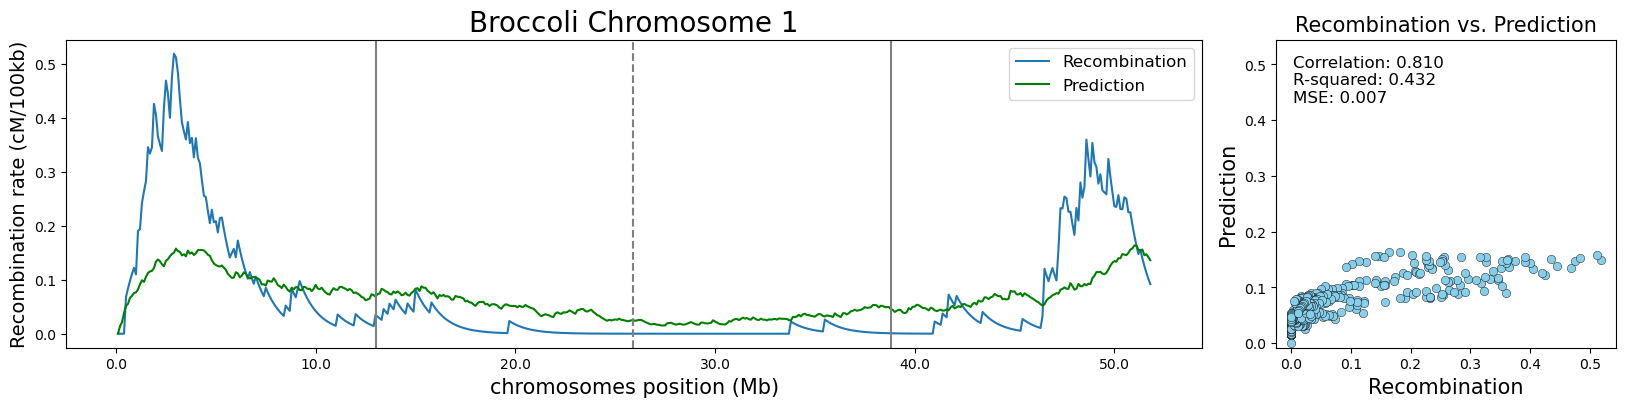

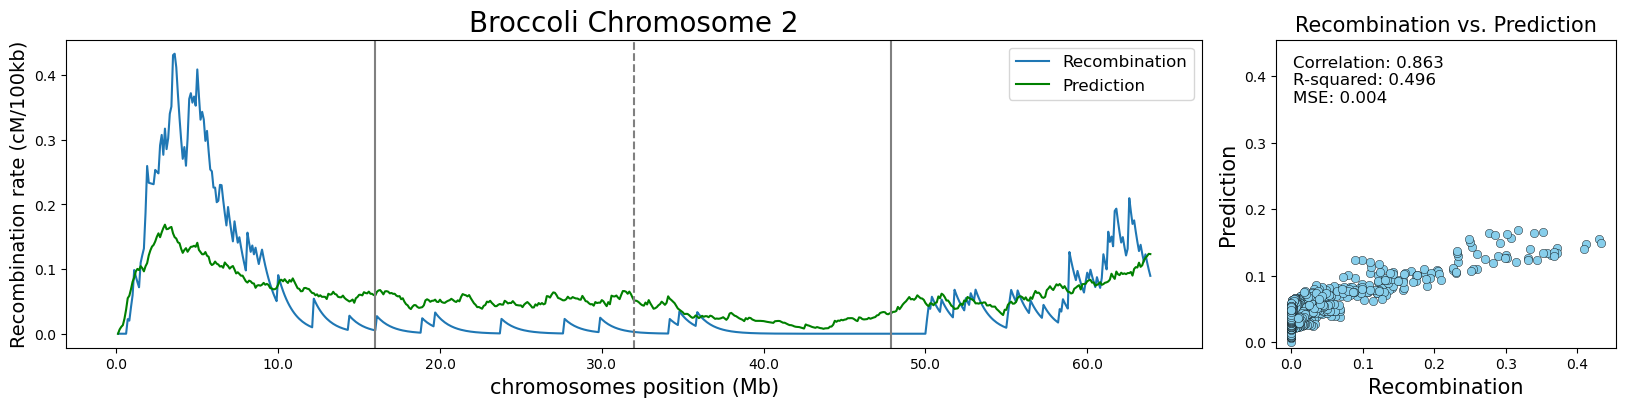

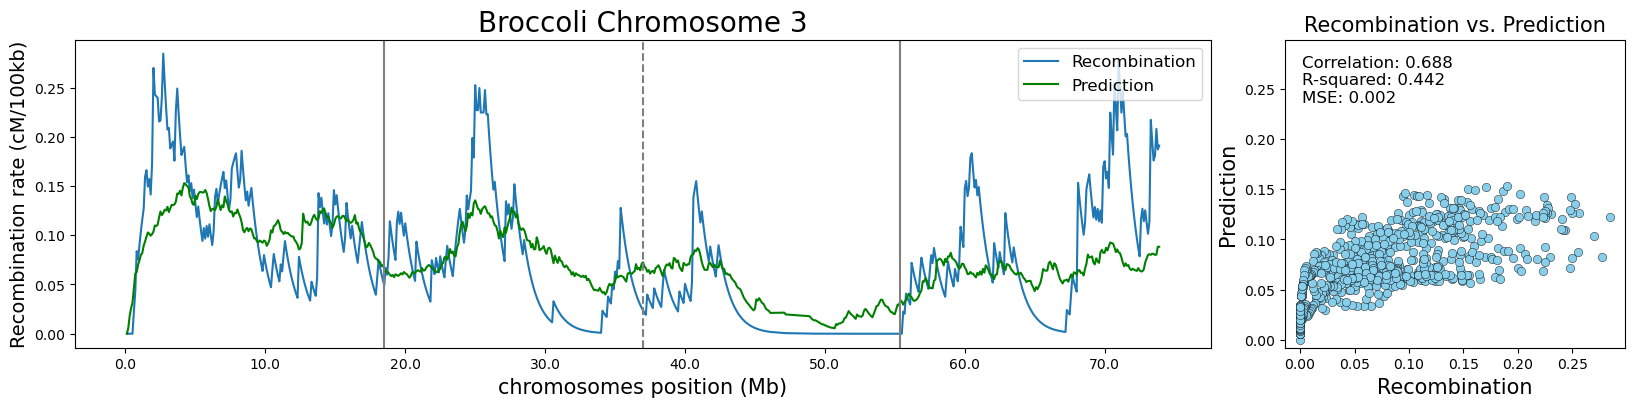

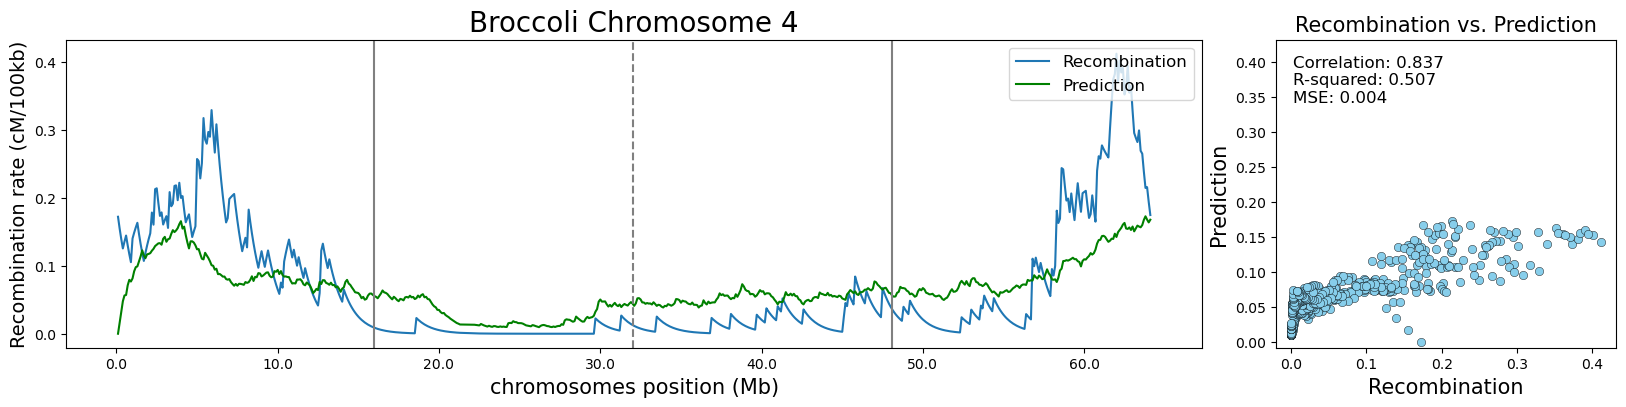

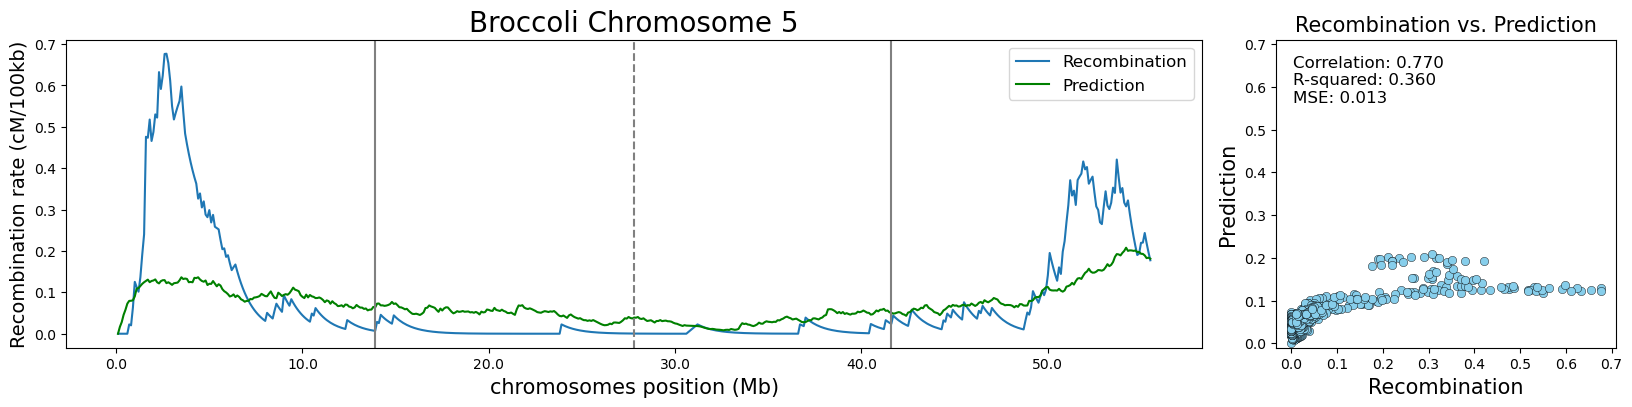

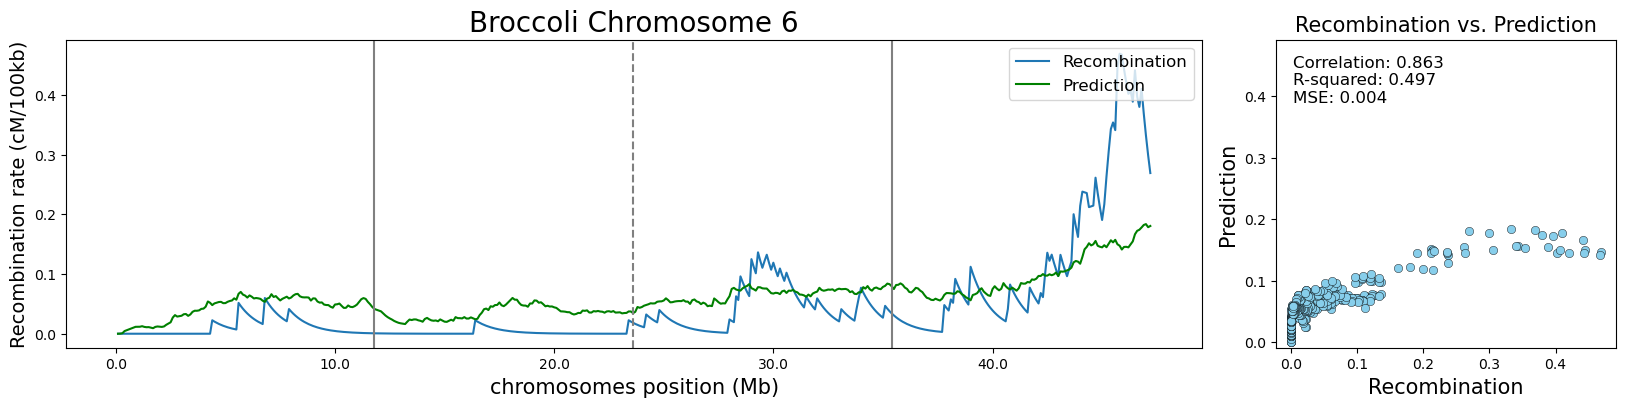

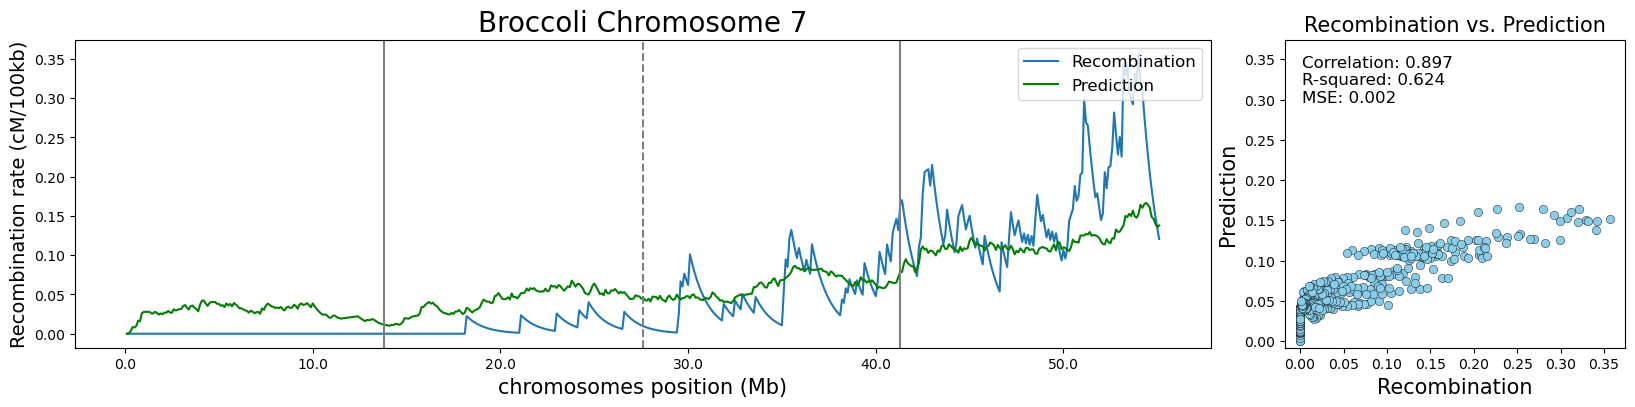

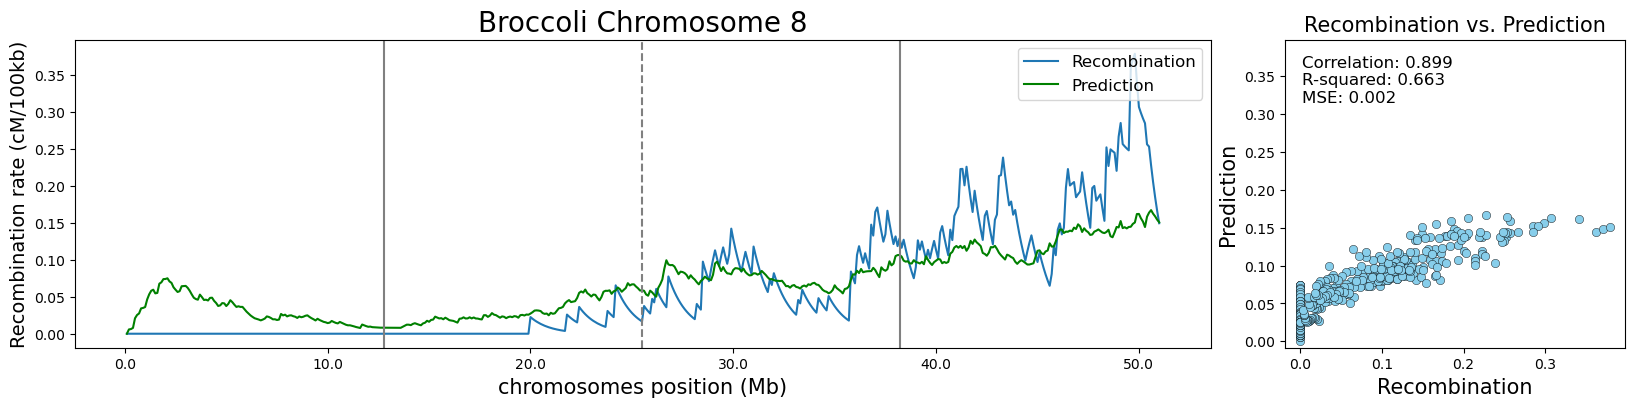

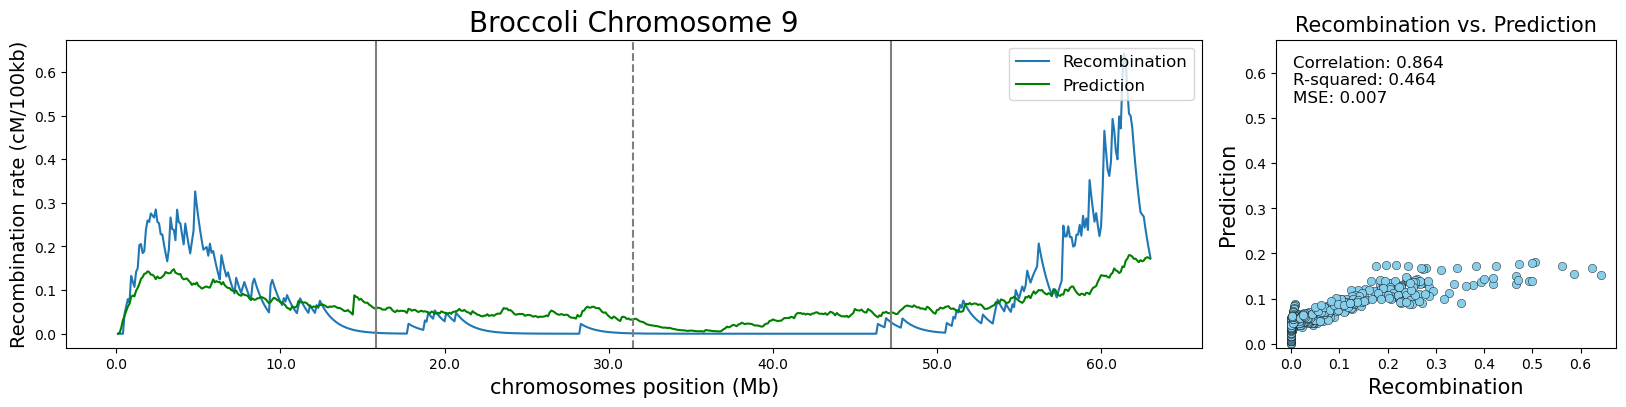

In [40]:
# Predictions and graphs for all chromosomes
for chr_number in range(1, 10):
    plot_chromosome_results(chr_number)
    plt.show()

# Data compilation

In [41]:
corr = pd.DataFrame({'corr':[corr_chr1, corr_chr2, corr_chr3, corr_chr4, corr_chr5, corr_chr6,corr_chr7,corr_chr8,corr_chr9,]})
r2 = pd.DataFrame({'R^2':[r2_chr1, r2_chr2, r2_chr3, r2_chr4, r2_chr5, r2_chr6, r2_chr7, r2_chr8, r2_chr9]})
mse = pd.DataFrame({'MSE':[mse_chr1, mse_chr2, mse_chr3, mse_chr4, mse_chr5, mse_chr6, mse_chr7, mse_chr8, mse_chr9]})
index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9',]})
tko_pb_table = pd.concat([index, corr, r2, mse], axis=1)
tko_pb_table

chr      corr       R^2       MSE
0  chr1  0.810168  0.432414  0.006837
1  chr2  0.862759  0.495584  0.003616
2  chr3  0.688078  0.441609  0.002276
3  chr4  0.837490  0.506801  0.004040
4  chr5  0.769688  0.359614  0.012866
5  chr6  0.863427  0.496595  0.003746
6  chr7  0.896955  0.624280  0.002171
7  chr8  0.899040  0.662941  0.002106
8  chr9  0.864435  0.464182  0.006516

Correlation between model predictions and recombination rates by quartiles

In [42]:
corr_q1 = pd.DataFrame({'Q1':[corr_q1_chr1,corr_q1_chr2,corr_q1_chr3,corr_q1_chr4,corr_q1_chr5,corr_q1_chr6,corr_q1_chr7,corr_q1_chr8,corr_q1_chr9]})
corr_q2 = pd.DataFrame({'Q2':[corr_q2_chr1,corr_q2_chr2,corr_q2_chr3,corr_q2_chr4,corr_q2_chr5,corr_q2_chr6,corr_q2_chr7,corr_q2_chr8,corr_q2_chr9]})
corr_q3 = pd.DataFrame({'Q3':[corr_q3_chr1,corr_q3_chr2,corr_q3_chr3,corr_q3_chr4,corr_q3_chr5,corr_q3_chr6,corr_q3_chr7,corr_q3_chr8,corr_q3_chr9]})
corr_q4 = pd.DataFrame({'Q4':[corr_q4_chr1,corr_q4_chr2,corr_q4_chr3,corr_q4_chr4,corr_q4_chr5,corr_q4_chr6,corr_q4_chr7,corr_q4_chr8,corr_q4_chr9]})

index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9']})
q_corr = pd.concat([index, corr_q1, corr_q2, corr_q3, corr_q4], axis=1)
q_corr_styled = q_corr.style.background_gradient(cmap="PRGn", vmin=-1, vmax=1)
q_corr_styled.set_table_styles([{'selector': 'th',
                                'props': [('text-align', 'center')]}])
q_corr_styled 

# Four model comparison

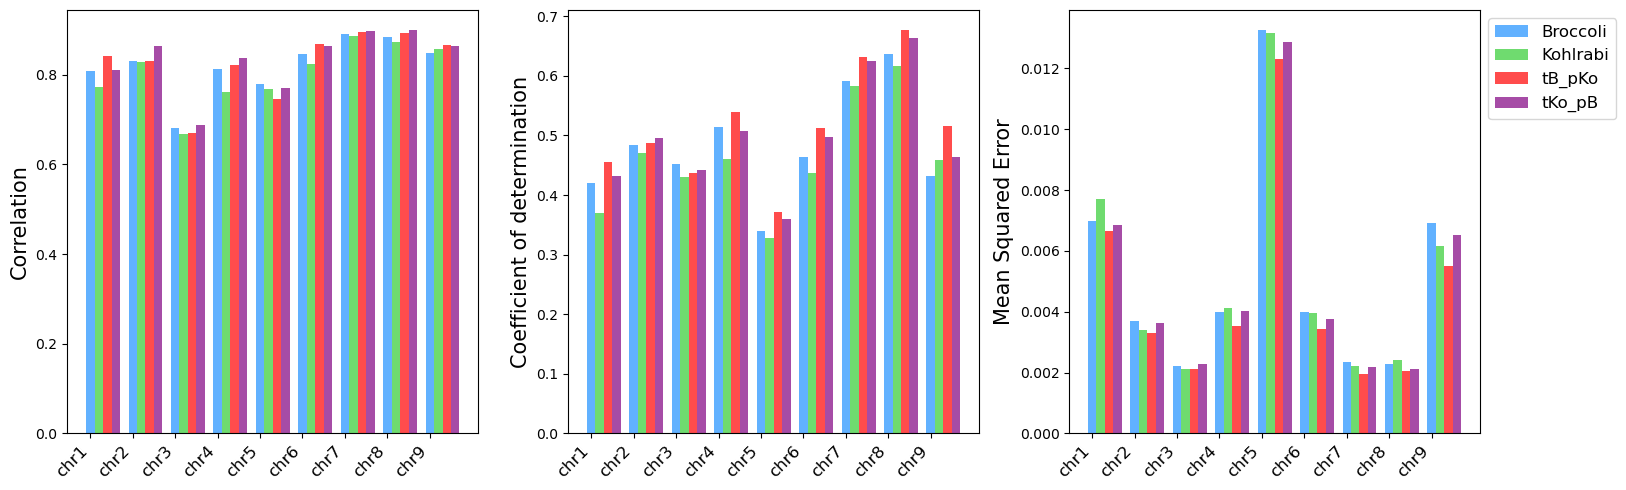

In [43]:
# Adjusting bar width
bar_width = 0.2

# Creating data positions
bar_positions_b = np.arange(len(b_table['chr']))
bar_positions_ko = bar_positions_b + bar_width
bar_positions_tb_pko = bar_positions_ko + bar_width
bar_positions_tko_pb = bar_positions_tb_pko + bar_width

# Creating subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# First chart
axs[0].bar(bar_positions_b, b_table['corr'], color='dodgerblue', width=bar_width, label='Broccoli', alpha=0.7)
axs[0].bar(bar_positions_ko, ko_table['corr'], color='limegreen', width=bar_width, label='Kohlrabi', alpha=0.7)
axs[0].bar(bar_positions_tb_pko, tb_pko_table['corr'], color='red', width=bar_width, label='tB_pKo', alpha=0.7)
axs[0].bar(bar_positions_tko_pb, tko_pb_table['corr'], color='purple', width=bar_width, label='tKo_pB', alpha=0.7)

axs[0].set_ylabel('Correlation', fontsize=15)

# Second chart

axs[1].bar(bar_positions_b, b_table['R^2'], color='dodgerblue', width=bar_width, label='Broccoli', alpha=0.7)
axs[1].bar(bar_positions_ko, ko_table['R^2'], color='limegreen', width=bar_width, label='Kohlrabi', alpha=0.7)
axs[1].bar(bar_positions_tb_pko, tb_pko_table['R^2'], color='red', width=bar_width, label='tB_pKo', alpha=0.7)
axs[1].bar(bar_positions_tko_pb, tko_pb_table['R^2'], color='purple', width=bar_width, label='tKo_pB', alpha=0.7)

axs[1].set_ylabel('Coefficient of determination', fontsize=15)

# Third chart

axs[2].bar(bar_positions_b, b_table['MSE'], color='dodgerblue', width=bar_width, label='Broccoli', alpha=0.7)
axs[2].bar(bar_positions_ko, ko_table['MSE'], color='limegreen', width=bar_width, label='Kohlrabi', alpha=0.7)
axs[2].bar(bar_positions_tb_pko, tb_pko_table['MSE'], color='red', width=bar_width, label='tB_pKo', alpha=0.7)
axs[2].bar(bar_positions_tko_pb, tko_pb_table['MSE'], color='purple', width=bar_width, label='tKo_pB', alpha=0.7)

axs[2].set_ylabel('Mean Squared Error', fontsize=15)

# Get chromosome labels from the 'chr' column
chr_labels = b_table['chr']

# Set x-axis labels for all three subplots
for ax in axs:
    ax.set_xticks(bar_positions_b)
    ax.set_xticklabels(chr_labels)

# Rotate labels for better readability
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Adjusting layout
plt.tight_layout()

# Place legend outside the subplots and above the last subplot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Show the figure
plt.show()

# Model trained with information from Brassica crosses to predict recombination on each Broccoli chromosome

In [44]:
study2.head(2)

cross reference   chr   start     end  srec  AAA_TTT  \
0  broccoli_cauliflower  broccoli  chr1       0  100000   0.0    10211   
1  broccoli_cauliflower  broccoli  chr1  100000  200000   0.0     8607   

   AAC_GTT  AAG_CTT  AAT_ATT  ...  CTA_TAG  CTC_GAG  GAA_TTC  GAC_GTC  \
0     4046     3224     6793  ...     2808     2650     4062     1442   
1     3784     4268     5584  ...     2366     3114     4309     1886   

   GCA_TGC  GCC_GGC  GGA_TCC  GTA_TAC  TAA_TTA  TCA_TGA  
0     1875     1694     2040     2575     5867     3734  
1     2236     1366     2460     2462     4906     3900  

[2 rows x 38 columns]

In [45]:
all_info_without_broccoli = study2[study2['reference'] != 'broccoli' ]
all_info_without_broccoli

cross    reference   chr     start       end      srec  \
5154    broccoli_cauliflower  cauliflower  chr1         0    100000  0.000000   
5155    broccoli_cauliflower  cauliflower  chr1    100000    200000  0.000000   
5156    broccoli_cauliflower  cauliflower  chr1    200000    300000  0.000000   
5157    broccoli_cauliflower  cauliflower  chr1    300000    400000  0.000000   
5158    broccoli_cauliflower  cauliflower  chr1    400000    500000  0.036497   
...                      ...          ...   ...       ...       ...       ...   
103831        white_kohlrabi     kohlrabi  chr9  64400000  64500000  0.189701   
103832        white_kohlrabi     kohlrabi  chr9  64500000  64600000  0.170731   
103833        white_kohlrabi     kohlrabi  chr9  64600000  64700000  0.153658   
103834        white_kohlrabi     kohlrabi  chr9  64700000  64800000  0.138292   
103835        white_kohlrabi     kohlrabi  chr9  64800000  64900000  0.124463   

        AAA_TTT  AAC_GTT  AAG_CTT  AAT_ATT  ...  CTA_TAG  CTC_GAG  GAA_TTC  \
5154       7564     3333     4169     5173  ...     2285     3305     4016   
5155      10160     4367     3241     6583  ...     3027     2943     4293   
5156       8720     3912     4245     5593  ...     2392     2934     4243   
5157       9366     3936     3780     6269  ...     2807     2774     4264   
5158      10349     4019     3807     6835  ...     2771     2445     4259   
...         ...      ...      ...      ...  ...      ...      ...      ...   
103831    11246     4299     3298     7081  ...     3236     2497     4036   
103832    10101     4700     3424     6216  ...     3550     2464     3793   
103833     9573     3974     3906     6380  ...     2617     2697     4222   
103834    10861     4256     3452     7026  ...     3009     2545     4034   
103835    10274     4087     3565     6577  ...     2821     2681     4143   

        GAC_GTC  GCA_TGC  GCC_GGC  GGA_TCC  GTA_TAC  TAA_TTA  TCA_TGA  
5154       1875     2308     2639     2685     2238     4461     4076  
5155       1426     1829     1111     2272     2547     5782     3654  
5156       1854     2192     1313     2436     2592     5015     3900  
5157       1696     2007     1058     2347     2602     5464     4006  
5158       1666     1908      912     1951     2584     6213     3981  
...         ...      ...      ...      ...      ...      ...      ...  
103831     1427     1941      843     1958     2721     6321     3730  
103832     1499     1899      856     1995     2509     6623     3638  
103833     1637     2012     1089     2204     2635     5604     3884  
103834     1621     1814      814     2014     2587     6326     3948  
103835     1672     1876     1104     2187     2488     5802     3849  

[83223 rows x 38 columns]

In [46]:
all_info_without_broccoli.reference.unique()

array(['cauliflower', 'kohlrabi', 'kale', 'white'], dtype=object)

In [47]:
# TRAINING MODEL WITH BRASSICA CROSSES
X_train = all_info_without_broccoli.drop(['cross', 'reference','chr','start','end','srec'], axis=1)
y_train = all_info_without_broccoli[['srec']]

model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=1)

In [48]:
# Objects with Broccoli data per chromosome
chr1 = b[b['chr']== 'chr1']
chr2 = b[b['chr']== 'chr2']
chr3 = b[b['chr']== 'chr3']
chr4 = b[b['chr']== 'chr4']
chr5 = b[b['chr']== 'chr5']
chr6 = b[b['chr']== 'chr6']
chr7 = b[b['chr']== 'chr7']
chr8 = b[b['chr']== 'chr8']
chr9 = b[b['chr']== 'chr9']

In [49]:
def plot_chromosome_results(chr_number):
    # Replace  with 'chr{chr_number}' 
    chromosomes_data = globals()[f'achr{chr_number}']
    chr_data = globals()[f'chr{chr_number}']

    # MODEL PREDICTIONS
    model_preds = model.predict(chr_data.drop(['cross', 'reference','chr','start','end','srec'], axis=1))
    
    #SMOOTHING
    model_spreds= np.zeros(len(model_preds))

    for i in  range(1, len(model_preds)): 
        model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9
        
    #CORRELATIONS BY QUARTILES
    c_q1 = int(len(chr_data)*0.25)
    c_q2 = int(len(chr_data)*0.50)
    c_q3 = int(len(chr_data)*0.75)
    
    rq1 = chr_data['srec'].iloc[0:c_q1]
    rq2 = chr_data['srec'].iloc[c_q1:c_q2]
    rq3 = chr_data['srec'].iloc[c_q2:c_q3]
    rq4 = chr_data['srec'].iloc[c_q3:int(len(chr_data))]

    pq1 = model_spreds[0:c_q1]
    pq2 = model_spreds[c_q1:c_q2]
    pq3 = model_spreds[c_q2:c_q3]
    pq4 = model_spreds[c_q3:int(len(chr_data))]

    corr_q1 = np.corrcoef(rq1, pq1)[0, 1]
    corr_q2 = np.corrcoef(rq2, pq2)[0, 1]
    corr_q3 = np.corrcoef(rq3, pq3)[0, 1]
    corr_q4 = np.corrcoef(rq4, pq4)[0, 1]
    
    globals()[f'corr_q1_chr{chr_number}'] = corr_q1
    globals()[f'corr_q2_chr{chr_number}'] = corr_q2
    globals()[f'corr_q3_chr{chr_number}'] = corr_q3
    globals()[f'corr_q4_chr{chr_number}'] = corr_q4
     
    # PLOTTING RESULTS
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4), gridspec_kw={'width_ratios': [10, 3]})

    # Line plot and correlation plot
    ax1.plot(chr_data.end, chr_data.srec, label='Recombination')
    ax1.plot(chr_data.end, model_spreds, label='Prediction', color='green')
    ax1.set_title(f'Broccoli Chromosome {chr_number}', fontsize=20)
    ax1.set_xlabel('chromosomes position (Mb)', fontsize=15)
    ax1.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
    ax1.legend(loc='upper right', fontsize=12)
    ticks = ax1.get_xticks() / 1000000
    ax1.set_xticklabels(ticks)
        
    chr_len = chr_data["end"].iloc[-1]
    q1 =round(chr_len * 0.25 / 100000) * 100000
    q2 =round(chr_len* 0.50 / 100000) * 100000
    q3 =round(chr_len * 0.75 / 100000) * 100000

    ax1.axvline(x=q1, color='gray', linestyle='-')
    ax1.axvline(x=q2, color='gray', linestyle='--')
    ax1.axvline(x=q3, color='gray', linestyle='-')

    # Scatter plot
    scatter = ax2.scatter(chr_data.srec, model_spreds, c='skyblue', edgecolors='black', linewidth= 0.3)
    ax2.set_title('Recombination vs. Prediction', fontsize=15)
    ax2.set_xlabel('Recombination', fontsize=15)
    ax2.set_ylabel('Prediction', fontsize=15)

    # Calculate correlation coefficient, coefficient of determination, and Mean Squared Error
    corr_chr = np.corrcoef(chr_data.srec, model_spreds)[0, 1]
    r2_chr = r2_score(chr_data.srec, model_spreds)
    mse_chr = mean_squared_error(chr_data.srec, model_spreds)

    # Calculate the aspect ratio based on the plot heights
    h1 = ax1.get_ylim()
    h2 = ax2.get_ylim()
    aspect_ratio = max(h1[1] - h1[0], h2[1] - h2[0]) / (max(h1[1], h2[1]) - min(h1[0], h2[0]))

    # Set the aspect ratio for the scatter plot only if it doesn't distort the square shape
    if aspect_ratio < 1:
        ax2.set_aspect('equal')

    # Display correlation coefficient, coefficient of determination, and Mean Squared Error as plain text
    globals()[f'corr_chr{chr_number}'] = corr_chr
    globals()[f'r2_chr{chr_number}'] = r2_chr
    globals()[f'mse_chr{chr_number}'] = mse_chr

    textstr = f'Correlation: {corr_chr:.3f}\nR-squared: {r2_chr:.3f}\nMSE: {mse_chr:.3f}'
    ax2.text(0.05, 0.95, textstr, transform=ax2.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

    # Adjustments to align the heights of the two plots
    max_height = max(h1[1], h2[1])
    ax1.set_ylim([h1[0], max_height])
    ax2.set_ylim([h2[0], max_height])

    # Reduce the separation between the plots
    plt.subplots_adjust(wspace=0.1)
    plt.show()

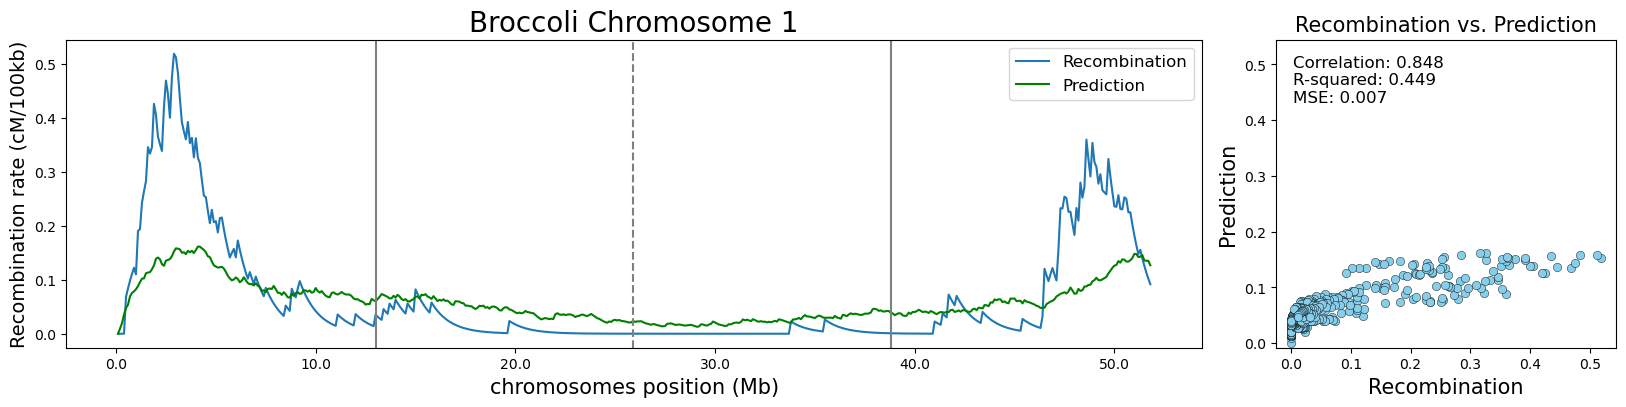

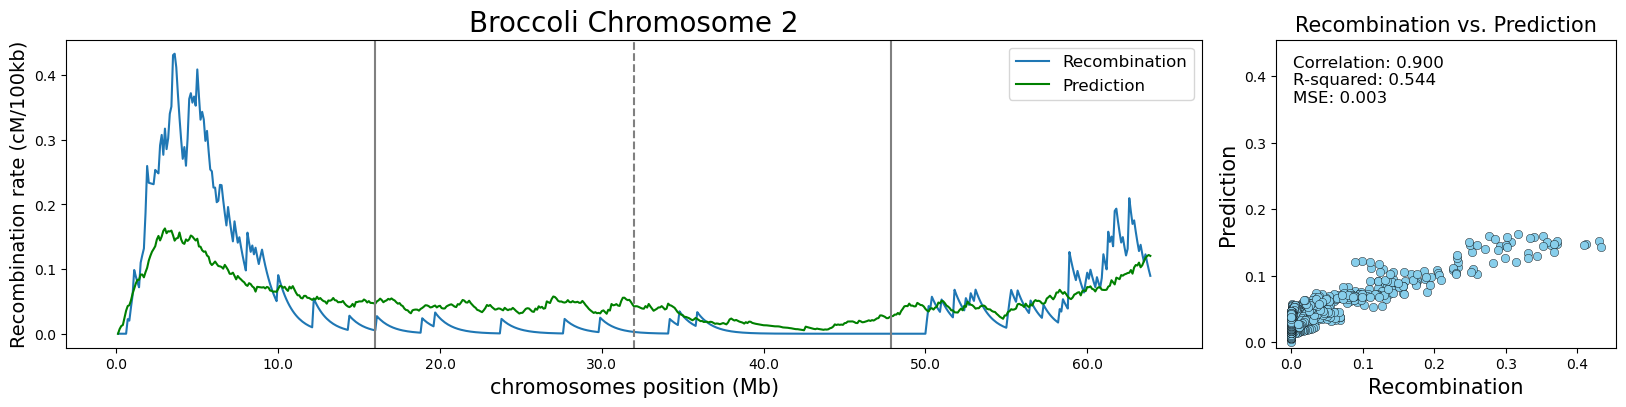

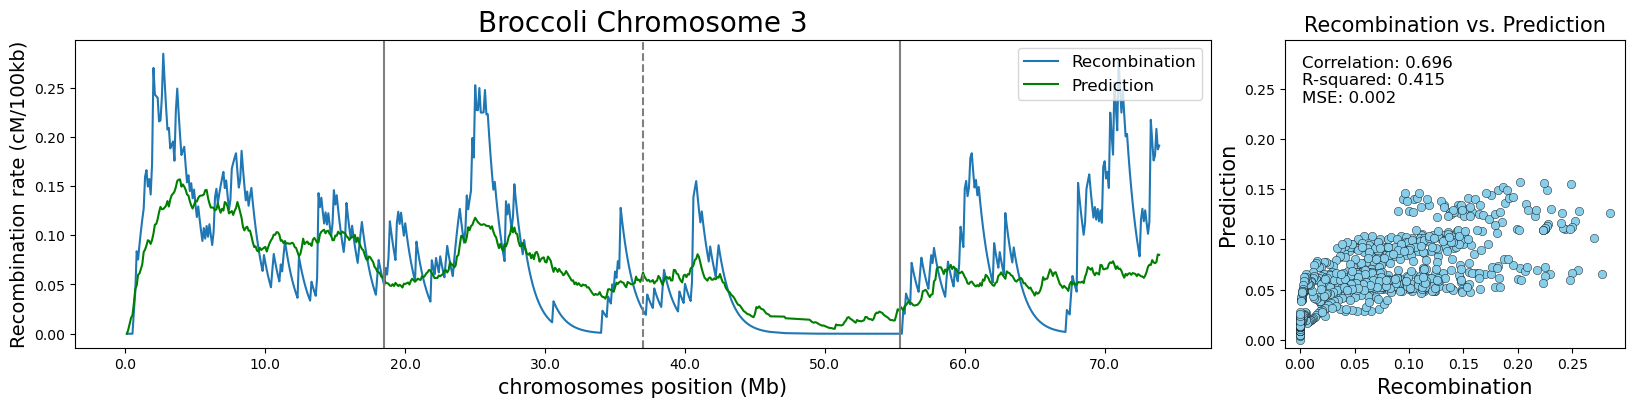

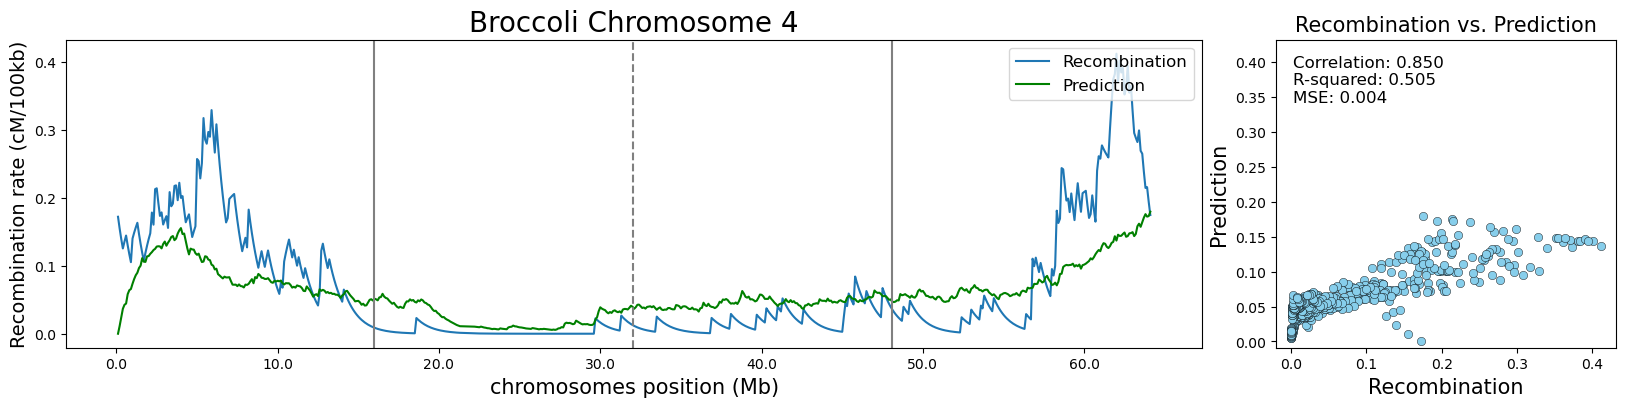

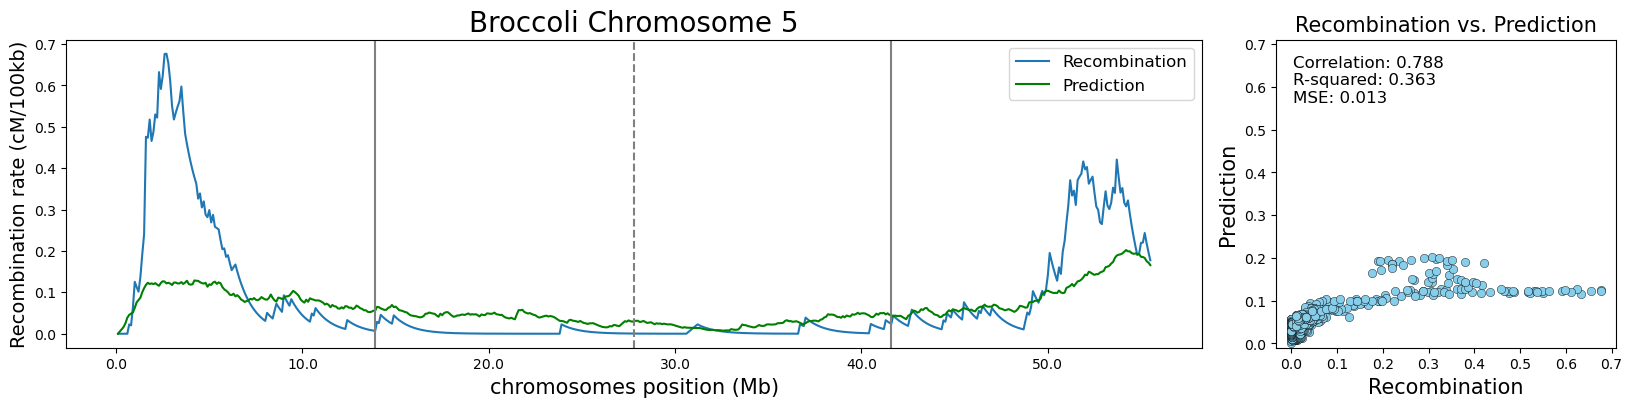

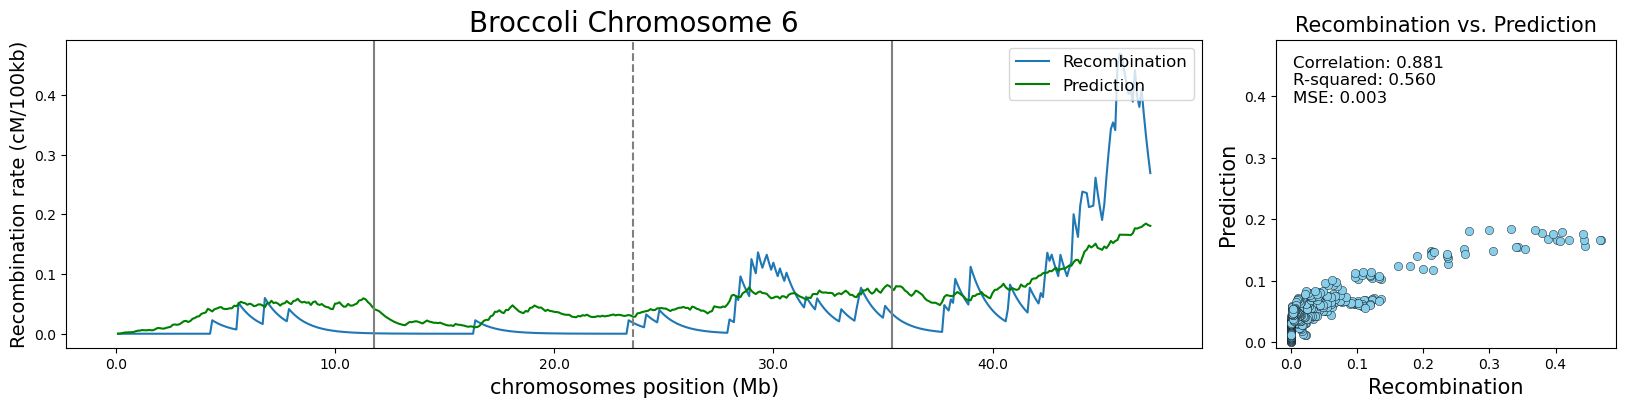

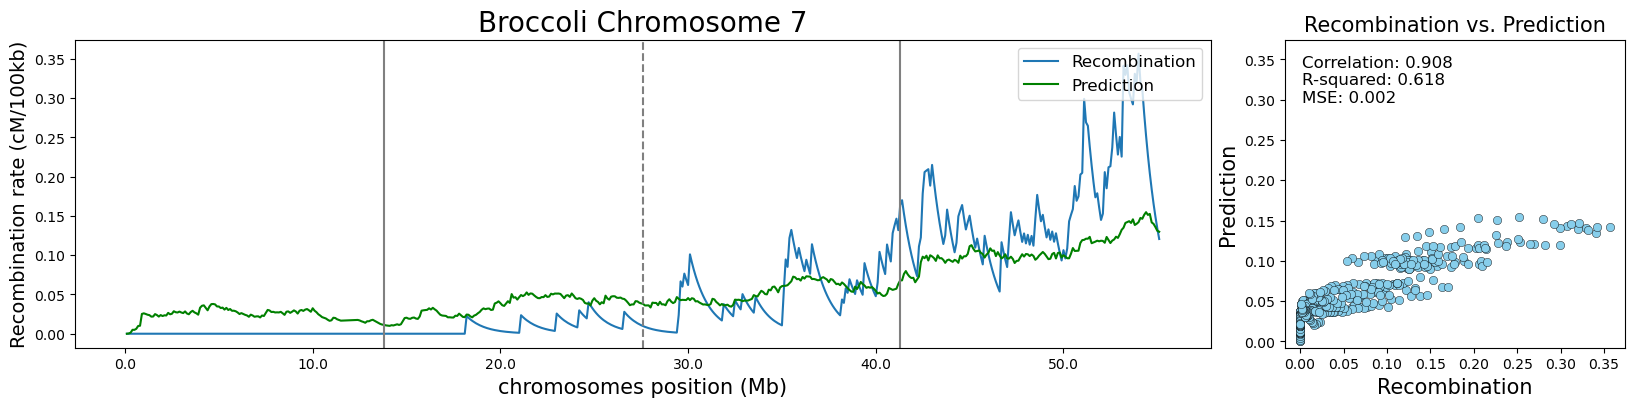

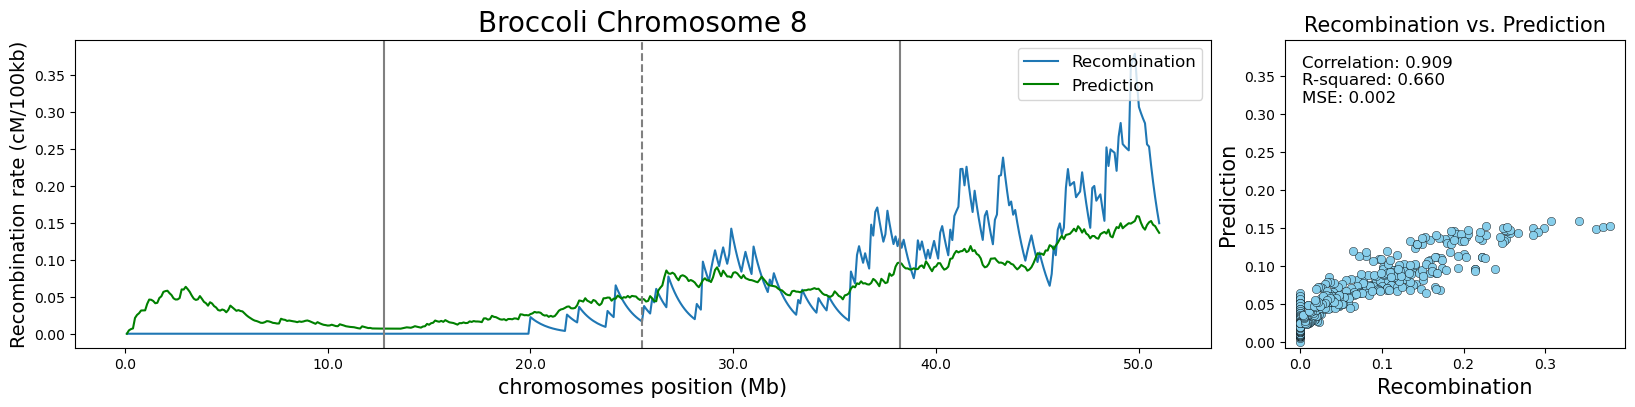

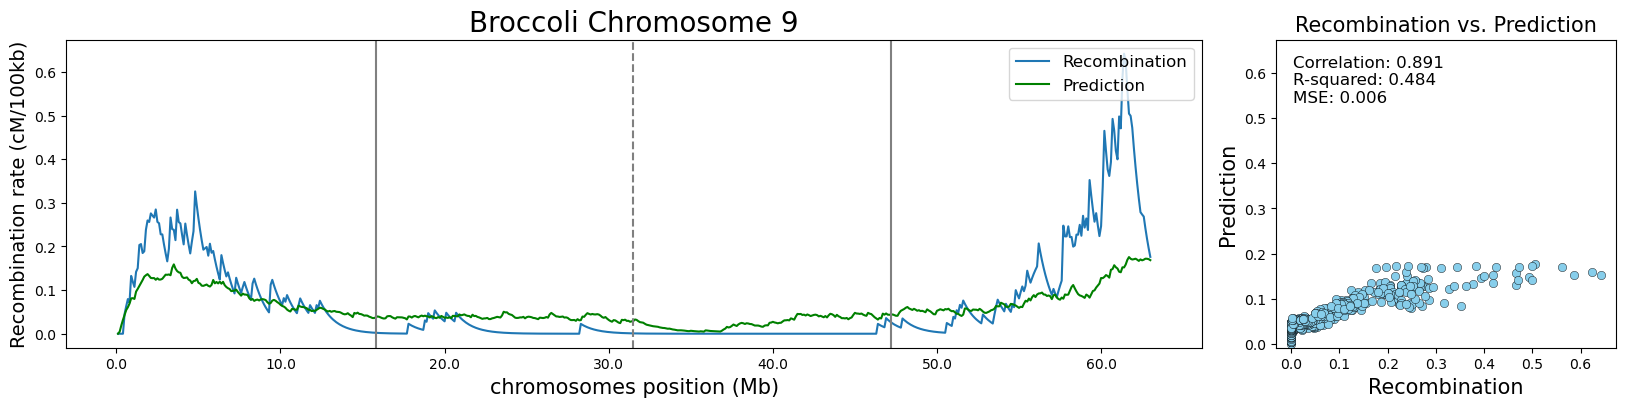

In [50]:
# Predictions and graphs for all chromosomes
for chr_number in range(1, 10):
    plot_chromosome_results(chr_number)
    plt.show()

# Data compilation

In [51]:
corr = pd.DataFrame({'corr':[corr_chr1, corr_chr2, corr_chr3, corr_chr4, corr_chr5, corr_chr6,corr_chr7,corr_chr8,corr_chr9,]})
r2 = pd.DataFrame({'R^2':[r2_chr1, r2_chr2, r2_chr3, r2_chr4, r2_chr5, r2_chr6, r2_chr7, r2_chr8, r2_chr9]})
mse = pd.DataFrame({'MSE':[mse_chr1, mse_chr2, mse_chr3, mse_chr4, mse_chr5, mse_chr6, mse_chr7, mse_chr8, mse_chr9]})
index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9',]})
ta_pb_table = pd.concat([index, corr, r2, mse], axis=1)
ta_pb_table

chr      corr       R^2       MSE
0  chr1  0.848254  0.448602  0.006642
1  chr2  0.900200  0.544464  0.003266
2  chr3  0.695673  0.414899  0.002385
3  chr4  0.849759  0.504992  0.004055
4  chr5  0.787901  0.363182  0.012794
5  chr6  0.881465  0.559899  0.003275
6  chr7  0.907707  0.617925  0.002207
7  chr8  0.909112  0.660401  0.002122
8  chr9  0.890544  0.484414  0.006270

In [52]:
corr_q1 = pd.DataFrame({'Q1':[corr_q1_chr1,corr_q1_chr2,corr_q1_chr3,corr_q1_chr4,corr_q1_chr5,corr_q1_chr6,corr_q1_chr7,corr_q1_chr8,corr_q1_chr9]})
corr_q2 = pd.DataFrame({'Q2':[corr_q2_chr1,corr_q2_chr2,corr_q2_chr3,corr_q2_chr4,corr_q2_chr5,corr_q2_chr6,corr_q2_chr7,corr_q2_chr8,corr_q2_chr9]})
corr_q3 = pd.DataFrame({'Q3':[corr_q3_chr1,corr_q3_chr2,corr_q3_chr3,corr_q3_chr4,corr_q3_chr5,corr_q3_chr6,corr_q3_chr7,corr_q3_chr8,corr_q3_chr9]})
corr_q4 = pd.DataFrame({'Q4':[corr_q4_chr1,corr_q4_chr2,corr_q4_chr3,corr_q4_chr4,corr_q4_chr5,corr_q4_chr6,corr_q4_chr7,corr_q4_chr8,corr_q4_chr9]})

index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9']})
q_corr = pd.concat([index, corr_q1, corr_q2, corr_q3, corr_q4], axis=1)
q_corr_styled = q_corr.style.background_gradient(cmap="PRGn", vmin=-1, vmax=1)
q_corr_styled.set_table_styles([{'selector': 'th',
                                'props': [('text-align', 'center')]}])
q_corr_styled 

# Model trained with information from Brassica crosses to predict recombination on each Kohlrabi chromosome

In [53]:
all_info_without_kohlrabi = study2[study2['reference'] != 'kohlrabi' ]
all_info_without_kohlrabi

cross reference   chr     start       end      srec  \
0      broccoli_cauliflower  broccoli  chr1         0    100000  0.000000   
1      broccoli_cauliflower  broccoli  chr1    100000    200000  0.000000   
2      broccoli_cauliflower  broccoli  chr1    200000    300000  0.000000   
3      broccoli_cauliflower  broccoli  chr1    300000    400000  0.036497   
4      broccoli_cauliflower  broccoli  chr1    400000    500000  0.032847   
...                     ...       ...   ...       ...       ...       ...   
98622        white_kohlrabi     white  chr9  65200000  65300000  0.164241   
98623        white_kohlrabi     white  chr9  65300000  65400000  0.174133   
98624        white_kohlrabi     white  chr9  65400000  65500000  0.156719   
98625        white_kohlrabi     white  chr9  65500000  65600000  0.141047   
98626        white_kohlrabi     white  chr9  65600000  65700000  0.126943   

       AAA_TTT  AAC_GTT  AAG_CTT  AAT_ATT  ...  CTA_TAG  CTC_GAG  GAA_TTC  \
0        10211     4046     3224     6793  ...     2808     2650     4062   
1         8607     3784     4268     5584  ...     2366     3114     4309   
2         9715     4085     3807     6370  ...     2876     2681     4269   
3         9583     3997     3850     6207  ...     2730     2744     4189   
4         9883     3941     4052     6189  ...     2442     2812     4330   
...        ...      ...      ...      ...  ...      ...      ...      ...   
98622    13046     4398     2857     7986  ...     3445     2265     4104   
98623    10420     4296     3396     6915  ...     3050     2620     4143   
98624     9892     4080     3727     6619  ...     2684     2541     4223   
98625    10062     4108     3840     6310  ...     2625     2669     4241   
98626    11053     4214     3150     7142  ...     3315     2567     4085   

       GAC_GTC  GCA_TGC  GCC_GGC  GGA_TCC  GTA_TAC  TAA_TTA  TCA_TGA  
0         1442     1875     1694     2040     2575     5867     3734  
1         1886     2236     1366     2460     2462     4906     3900  
2         1608     1965     1048     2261     2642     5753     3912  
3         1819     2026     1100     2224     2473     5611     3977  
4         1819     1813     1146     2323     2409     5599     3867  
...        ...      ...      ...      ...      ...      ...      ...  
98622     1209     1700      583     1649     2820     6948     3659  
98623     1553     2070      838     1981     2537     6140     3933  
98624     1620     1950     1032     2151     2656     5853     3810  
98625     1817     1906     1022     2236     2582     5725     3886  
98626     1368     1683      971     1973     2526     6182     3946  

[82980 rows x 38 columns]

In [54]:
all_info_without_kohlrabi.reference.unique()

array(['broccoli', 'cauliflower', 'kale', 'white'], dtype=object)

In [55]:
# TRAINING MODEL WITH BRASSICA CROSSES
X_train = all_info_without_kohlrabi.drop(['cross', 'reference','chr','start','end','srec'], axis=1)
y_train = all_info_without_kohlrabi[['srec']]

model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=1)

In [56]:
# Objects with Kohlrabi data per chromosome
chr1 = ko[ko['chr']== 'chr1']
chr2 = ko[ko['chr']== 'chr3']
chr4 = ko[ko['chr']== 'chr4']
chr5 = ko[ko['chr']== 'chr5']
chr6 = ko[ko['chr']== 'chr6']
chr7 = ko[ko['chr']== 'chr7']
chr8 = ko[ko['chr']== 'chr8']
chr9 = ko[ko['chr']== 'chr9']

In [57]:
def plot_chromosome_results(chr_number):
    # Replace  with 'chr{chr_number}' 
    chromosomes_data = globals()[f'achr{chr_number}']
    chr_data = globals()[f'chr{chr_number}']

    # MODEL PREDICTIONS
    model_preds = model.predict(chr_data.drop(['cross', 'reference','chr','start','end','srec'], axis=1))
    
    #SMOOTHING
    model_spreds= np.zeros(len(model_preds))

    for i in  range(1, len(model_preds)): 
        model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9
        
    #CORRELATIONS BY QUARTILES
    c_q1 = int(len(chr_data)*0.25)
    c_q2 = int(len(chr_data)*0.50)
    c_q3 = int(len(chr_data)*0.75)
    
    rq1 = chr_data['srec'].iloc[0:c_q1]
    rq2 = chr_data['srec'].iloc[c_q1:c_q2]
    rq3 = chr_data['srec'].iloc[c_q2:c_q3]
    rq4 = chr_data['srec'].iloc[c_q3:int(len(chr_data))]

    pq1 = model_spreds[0:c_q1]
    pq2 = model_spreds[c_q1:c_q2]
    pq3 = model_spreds[c_q2:c_q3]
    pq4 = model_spreds[c_q3:int(len(chr_data))]

    corr_q1 = np.corrcoef(rq1, pq1)[0, 1]
    corr_q2 = np.corrcoef(rq2, pq2)[0, 1]
    corr_q3 = np.corrcoef(rq3, pq3)[0, 1]
    corr_q4 = np.corrcoef(rq4, pq4)[0, 1]
    
    globals()[f'corr_q1_chr{chr_number}'] = corr_q1
    globals()[f'corr_q2_chr{chr_number}'] = corr_q2
    globals()[f'corr_q3_chr{chr_number}'] = corr_q3
    globals()[f'corr_q4_chr{chr_number}'] = corr_q4
     
    # PLOTTING RESULTS
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4), gridspec_kw={'width_ratios': [10, 3]})

    # Line plot and correlation plot
    ax1.plot(chr_data.end, chr_data.srec, label='Recombination')
    ax1.plot(chr_data.end, model_spreds, label='Prediction', color='green')
    ax1.set_title(f'Kohlrabi Chromosome {chr_number}', fontsize=20)
    ax1.set_xlabel('chromosomes position (Mb)', fontsize=15)
    ax1.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
    ax1.legend(loc='upper right', fontsize=12)
    ticks = ax1.get_xticks() / 1000000
    ax1.set_xticklabels(ticks)
        
    chr_len = chr_data["end"].iloc[-1]
    q1 =round(chr_len * 0.25 / 100000) * 100000
    q2 =round(chr_len* 0.50 / 100000) * 100000
    q3 =round(chr_len * 0.75 / 100000) * 100000

    ax1.axvline(x=q1, color='gray', linestyle='-')
    ax1.axvline(x=q2, color='gray', linestyle='--')
    ax1.axvline(x=q3, color='gray', linestyle='-')

    # Scatter plot
    scatter = ax2.scatter(chr_data.srec, model_spreds, c='skyblue', edgecolors='black', linewidth= 0.3)
    ax2.set_title('Recombination vs. Prediction', fontsize=15)
    ax2.set_xlabel('Recombination', fontsize=15)
    ax2.set_ylabel('Prediction', fontsize=15)

    # Calculate correlation coefficient, coefficient of determination, and Mean Squared Error
    corr_chr = np.corrcoef(chr_data.srec, model_spreds)[0, 1]
    r2_chr = r2_score(chr_data.srec, model_spreds)
    mse_chr = mean_squared_error(chr_data.srec, model_spreds)

    # Calculate the aspect ratio based on the plot heights
    h1 = ax1.get_ylim()
    h2 = ax2.get_ylim()
    aspect_ratio = max(h1[1] - h1[0], h2[1] - h2[0]) / (max(h1[1], h2[1]) - min(h1[0], h2[0]))

    # Set the aspect ratio for the scatter plot only if it doesn't distort the square shape
    if aspect_ratio < 1:
        ax2.set_aspect('equal')

    # Display correlation coefficient, coefficient of determination, and Mean Squared Error as plain text
    globals()[f'corr_chr{chr_number}'] = corr_chr
    globals()[f'r2_chr{chr_number}'] = r2_chr
    globals()[f'mse_chr{chr_number}'] = mse_chr

    textstr = f'Correlation: {corr_chr:.3f}\nR-squared: {r2_chr:.3f}\nMSE: {mse_chr:.3f}'
    ax2.text(0.05, 0.95, textstr, transform=ax2.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

    # Adjustments to align the heights of the two plots
    max_height = max(h1[1], h2[1])
    ax1.set_ylim([h1[0], max_height])
    ax2.set_ylim([h2[0], max_height])

    # Reduce the separation between the plots
    plt.subplots_adjust(wspace=0.1)
    plt.show()

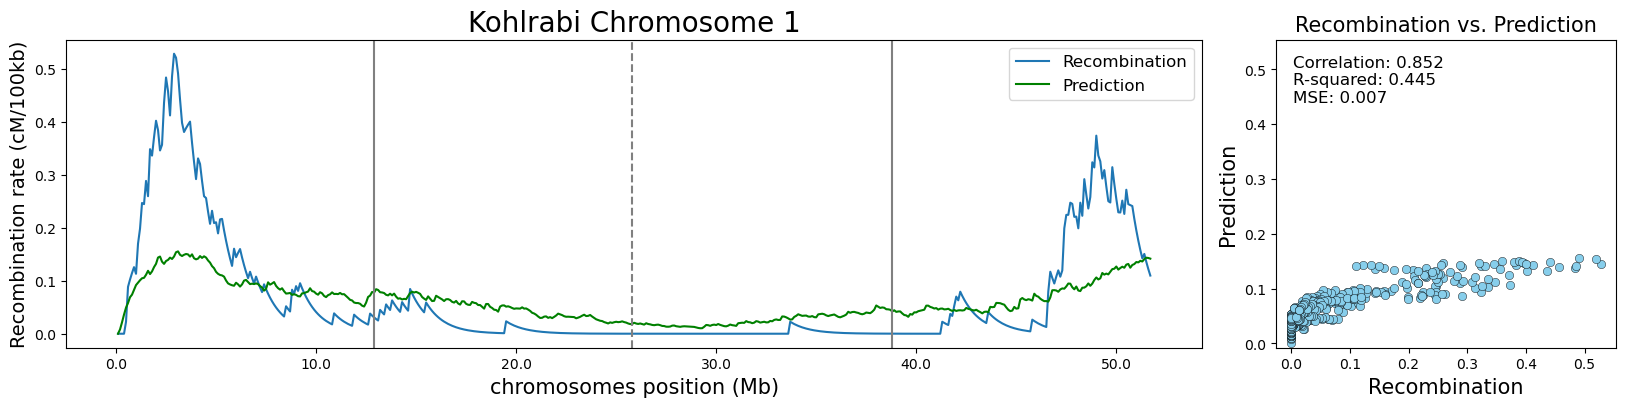

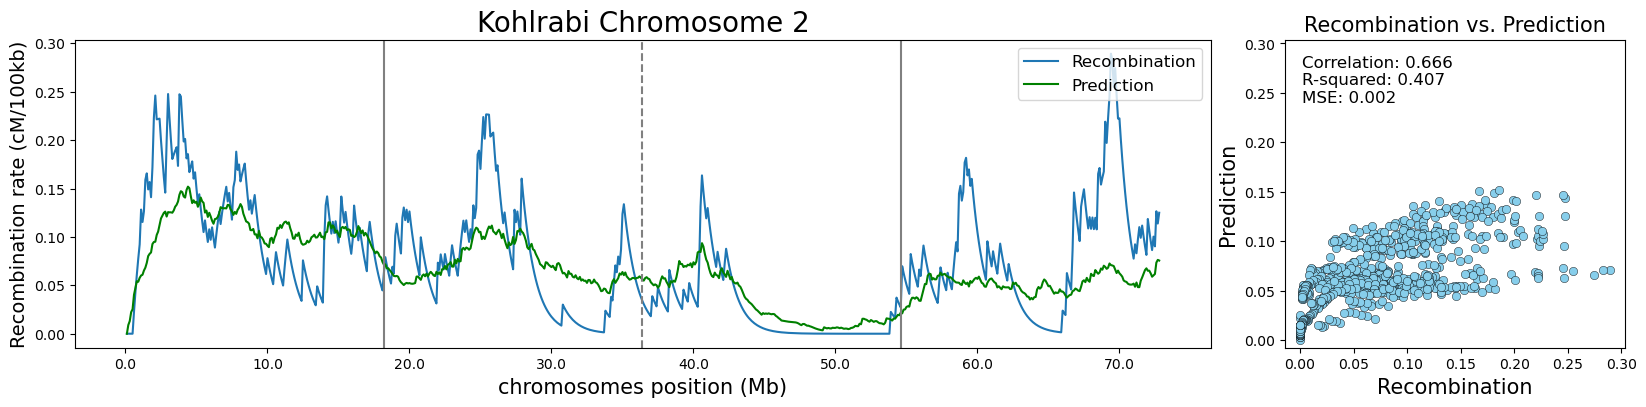

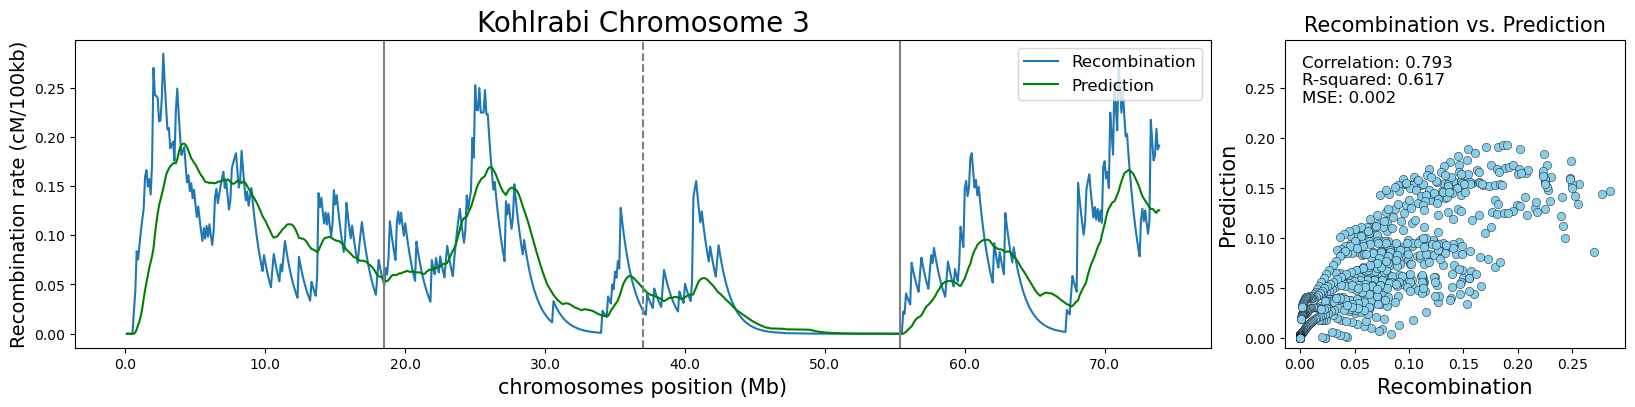

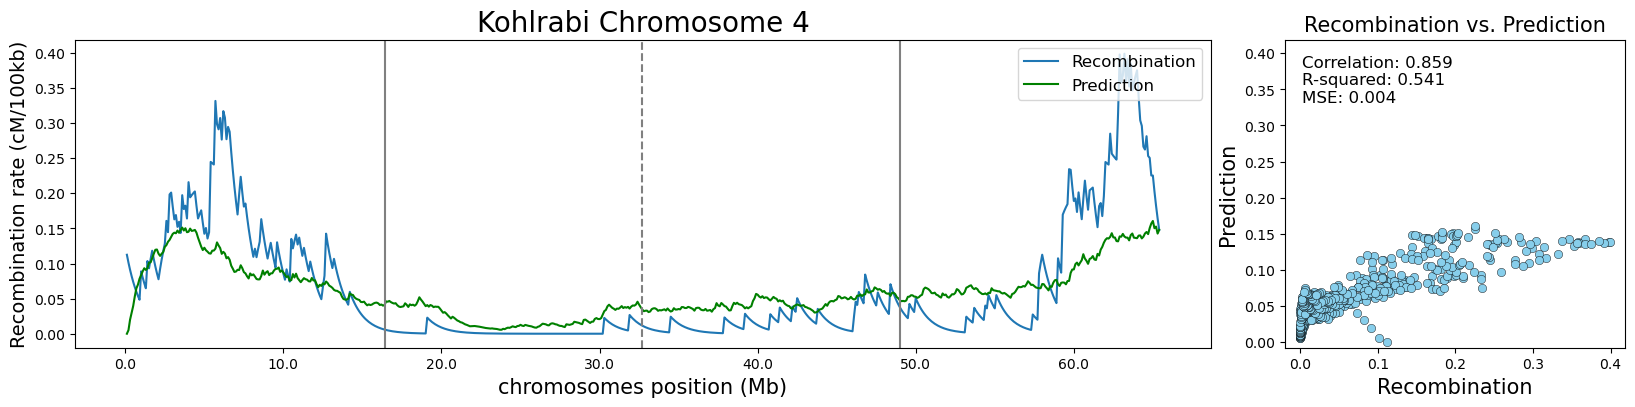

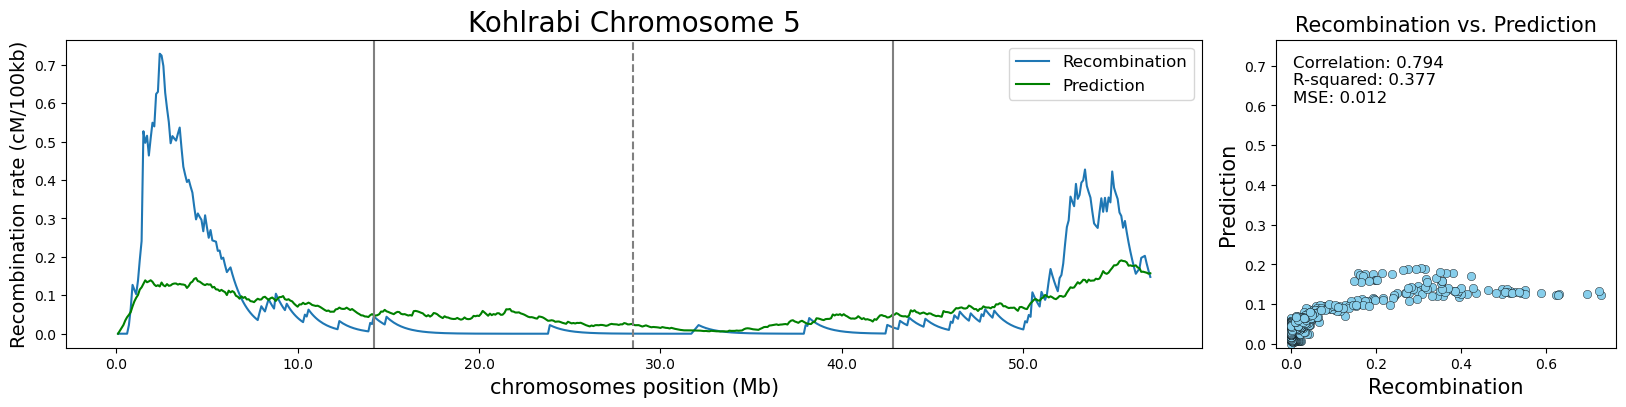

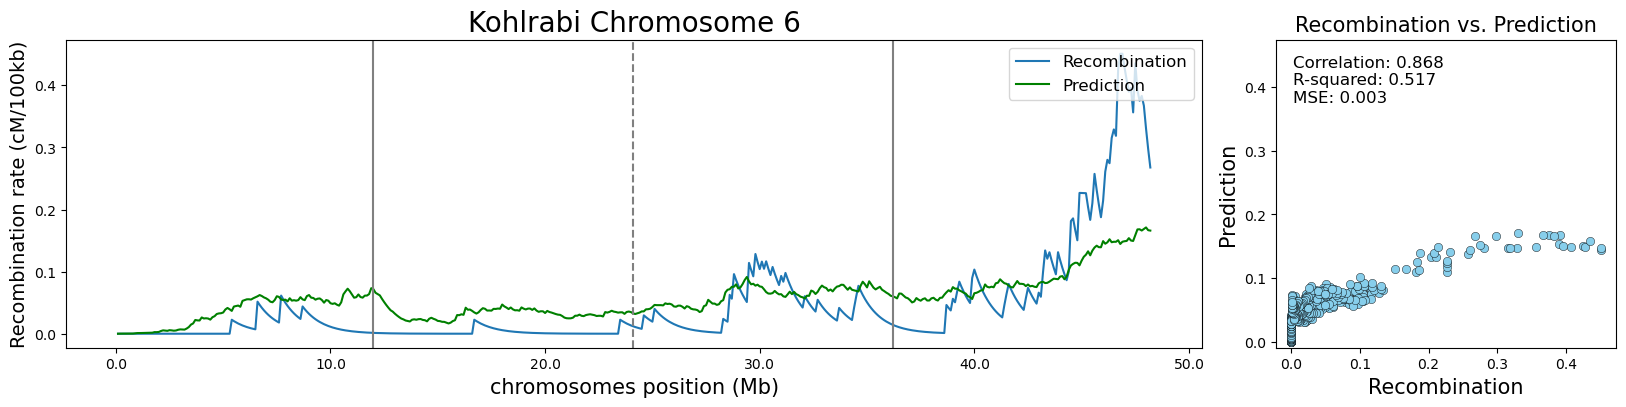

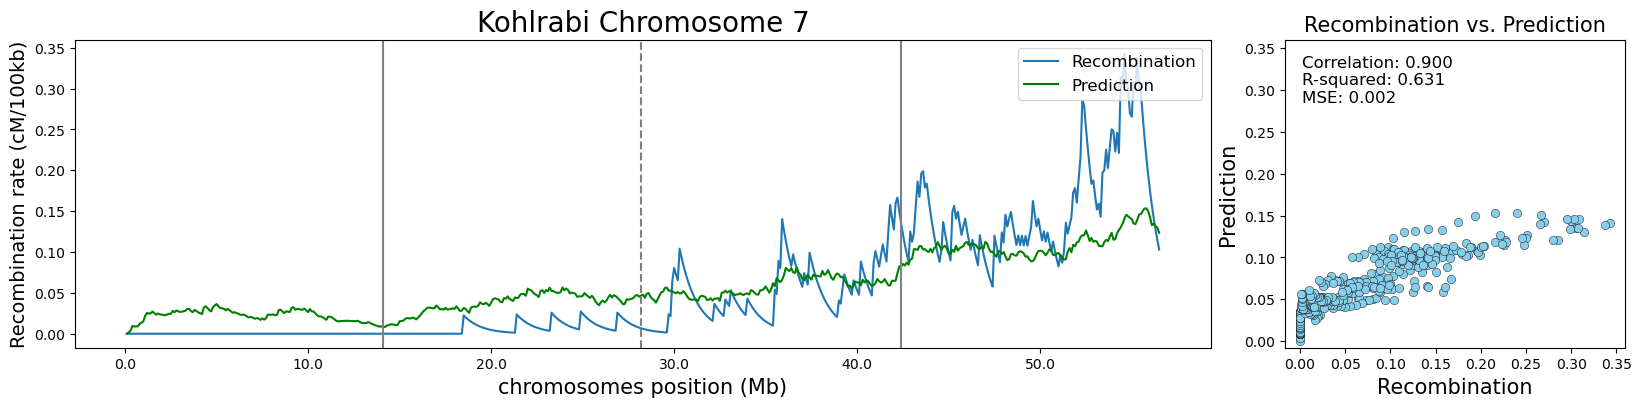

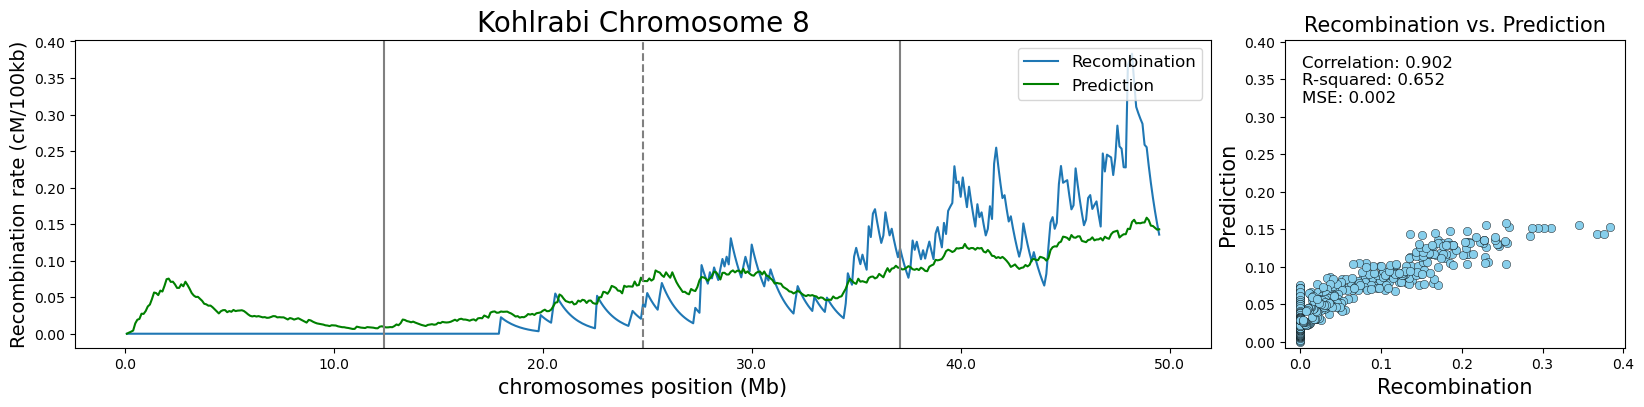

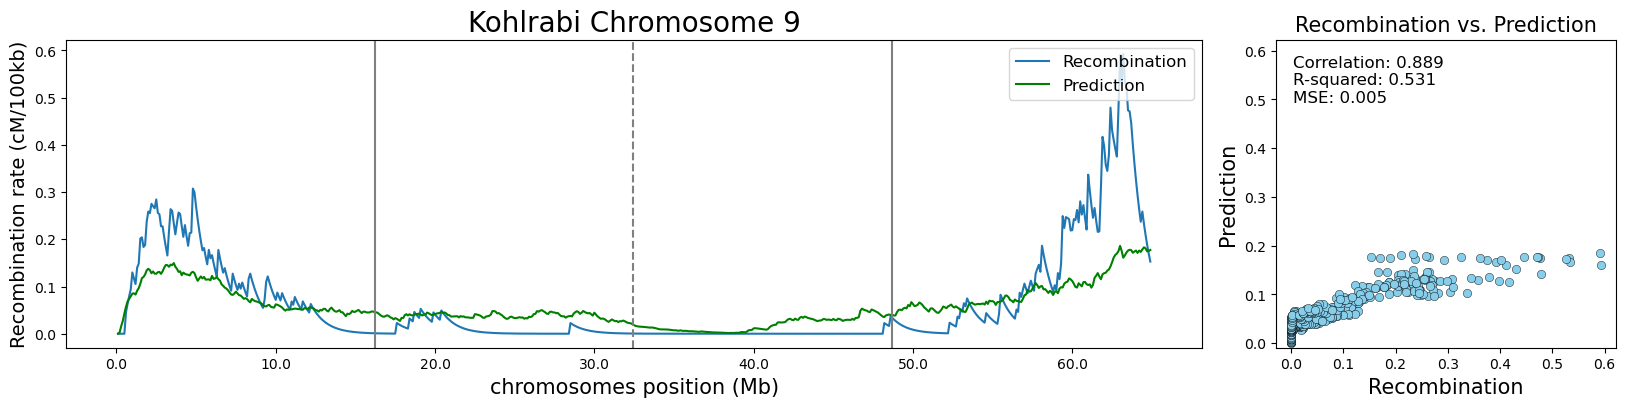

In [58]:
# Predictions and graphs for all chromosomes
for chr_number in range(1, 10):
    plot_chromosome_results(chr_number)
    plt.show()

# Data compilation

In [59]:
corr = pd.DataFrame({'corr':[corr_chr1, corr_chr2, corr_chr3, corr_chr4, corr_chr5, corr_chr6,corr_chr7,corr_chr8,corr_chr9,]})
r2 = pd.DataFrame({'R^2':[r2_chr1, r2_chr2, r2_chr3, r2_chr4, r2_chr5, r2_chr6, r2_chr7, r2_chr8, r2_chr9]})
mse = pd.DataFrame({'MSE':[mse_chr1, mse_chr2, mse_chr3, mse_chr4, mse_chr5, mse_chr6, mse_chr7, mse_chr8, mse_chr9]})
index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9',]})
ta_pko_table = pd.concat([index, corr, r2, mse], axis=1)
ta_pko_table

chr      corr       R^2       MSE
0  chr1  0.852338  0.445058  0.006769
1  chr2  0.666001  0.406629  0.002214
2  chr3  0.792585  0.617145  0.001561
3  chr4  0.858844  0.540733  0.003517
4  chr5  0.793674  0.376941  0.012208
5  chr6  0.867701  0.516617  0.003390
6  chr7  0.900036  0.630664  0.001966
7  chr8  0.902098  0.651507  0.002205
8  chr9  0.889334  0.530996  0.005340

In [60]:
corr_q1 = pd.DataFrame({'Q1':[corr_q1_chr1,corr_q1_chr2,corr_q1_chr3,corr_q1_chr4,corr_q1_chr5,corr_q1_chr6,corr_q1_chr7,corr_q1_chr8,corr_q1_chr9]})
corr_q2 = pd.DataFrame({'Q2':[corr_q2_chr1,corr_q2_chr2,corr_q2_chr3,corr_q2_chr4,corr_q2_chr5,corr_q2_chr6,corr_q2_chr7,corr_q2_chr8,corr_q2_chr9]})
corr_q3 = pd.DataFrame({'Q3':[corr_q3_chr1,corr_q3_chr2,corr_q3_chr3,corr_q3_chr4,corr_q3_chr5,corr_q3_chr6,corr_q3_chr7,corr_q3_chr8,corr_q3_chr9]})
corr_q4 = pd.DataFrame({'Q4':[corr_q4_chr1,corr_q4_chr2,corr_q4_chr3,corr_q4_chr4,corr_q4_chr5,corr_q4_chr6,corr_q4_chr7,corr_q4_chr8,corr_q4_chr9]})

index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9']})
q_corr = pd.concat([index, corr_q1, corr_q2, corr_q3, corr_q4], axis=1)
q_corr_styled = q_corr.style.background_gradient(cmap="PRGn", vmin=-1, vmax=1)
q_corr_styled.set_table_styles([{'selector': 'th',
                                'props': [('text-align', 'center')]}])
q_corr_styled 

# Comparison of the six models

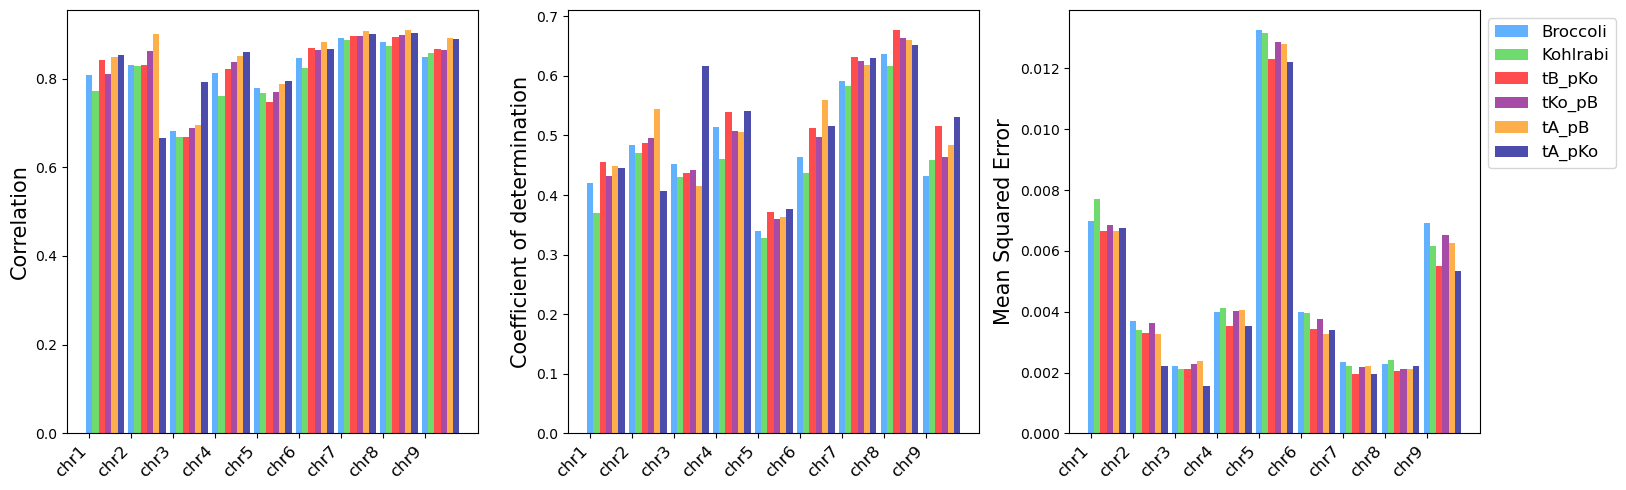

In [61]:
# Adjusting bar width
bar_width = 0.15

# Creating data positions
bar_positions_b = np.arange(len(b_table['chr']))
bar_positions_ko = bar_positions_b + bar_width
bar_positions_tb_pko = bar_positions_ko + bar_width
bar_positions_tko_pb = bar_positions_tb_pko + bar_width
bar_positions_ta_pb = bar_positions_tko_pb + bar_width
bar_positions_ta_pko = bar_positions_ta_pb + bar_width

# Creating subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# First chart
axs[0].bar(bar_positions_b, b_table['corr'], color='dodgerblue', width=bar_width, label='Broccoli', alpha=0.7)
axs[0].bar(bar_positions_ko, ko_table['corr'], color='limegreen', width=bar_width, label='Kohlrabi', alpha=0.7)
axs[0].bar(bar_positions_tb_pko, tb_pko_table['corr'], color='red', width=bar_width, label='tB_pKo', alpha=0.7)
axs[0].bar(bar_positions_tko_pb, tko_pb_table['corr'], color='purple', width=bar_width, label='tKo_pB', alpha=0.7)
axs[0].bar(bar_positions_ta_pb, ta_pb_table['corr'], color='darkorange', width=bar_width, label='tA_pB', alpha=0.7)
axs[0].bar(bar_positions_ta_pko, ta_pko_table['corr'], color='darkblue', width=bar_width, label='tA_pKo', alpha=0.7)

axs[0].set_ylabel('Correlation', fontsize=15)

# Second chart
axs[1].bar(bar_positions_b, b_table['R^2'], color='dodgerblue', width=bar_width, label='Broccoli', alpha=0.7)
axs[1].bar(bar_positions_ko, ko_table['R^2'], color='limegreen', width=bar_width, label='Kohlrabi', alpha=0.7)
axs[1].bar(bar_positions_tb_pko, tb_pko_table['R^2'], color='red', width=bar_width, label='tB_pKo', alpha=0.7)
axs[1].bar(bar_positions_tko_pb, tko_pb_table['R^2'], color='purple', width=bar_width, label='tKo_pB', alpha=0.7)
axs[1].bar(bar_positions_ta_pb, ta_pb_table['R^2'], color='darkorange', width=bar_width, label='tA_pB', alpha=0.7)
axs[1].bar(bar_positions_ta_pko, ta_pko_table['R^2'], color='darkblue', width=bar_width, label='tA_pKo', alpha=0.7)

axs[1].set_ylabel('Coefficient of determination', fontsize=15)

# Third chart

axs[2].bar(bar_positions_b, b_table['MSE'], color='dodgerblue', width=bar_width, label='Broccoli', alpha=0.7)
axs[2].bar(bar_positions_ko, ko_table['MSE'], color='limegreen', width=bar_width, label='Kohlrabi', alpha=0.7)
axs[2].bar(bar_positions_tb_pko, tb_pko_table['MSE'], color='red', width=bar_width, label='tB_pKo', alpha=0.7)
axs[2].bar(bar_positions_tko_pb, tko_pb_table['MSE'], color='purple', width=bar_width, label='tKo_pB', alpha=0.7)
axs[2].bar(bar_positions_ta_pb, ta_pb_table['MSE'], color='darkorange', width=bar_width, label='tA_pB', alpha=0.7)
axs[2].bar(bar_positions_ta_pko, ta_pko_table['MSE'], color='darkblue', width=bar_width, label='tA_pKo', alpha=0.7)

axs[2].set_ylabel('Mean Squared Error', fontsize=15)

# Get chromosome labels from the 'chr' column
chr_labels = b_table['chr']

# Set x-axis labels for all three subplots
for ax in axs:
    ax.set_xticks(bar_positions_b)
    ax.set_xticklabels(chr_labels)

# Rotate labels for better readability
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Adjusting layout
plt.tight_layout()

# Place legend outside the subplots and above the last subplot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Show the figure
plt.show()

In [62]:
summary = {'Training_set': ['Broccoli', 'Kohlrabi', 'Broccoli', 'Kohlrabi', 'All_except_Broccoli', 'All_except_Kohlrabi'],
           'Testing_set': ['Broccoli', 'Kohlrabi', 'Kohlrabi', 'Broccoli', 'Broccoli', 'Kohlrabi', ],
           'corr': [b_table.describe().iloc[1,0].round(3), ko_table.describe().iloc[1,0].round(3), tb_pko_table.describe().iloc[1,0].round(3), tko_pb_table.describe().iloc[1,0].round(3), ta_pb_table.describe().iloc[1,0].round(3), ta_pko_table.describe().iloc[1,0].round(3)],
           'R^2': [b_table.describe().iloc[1,1].round(3), ko_table.describe().iloc[1,1].round(3), tb_pko_table.describe().iloc[1,1].round(3), tko_pb_table.describe().iloc[1,1].round(3), ta_pb_table.describe().iloc[1,1].round(3), ta_pko_table.describe().iloc[1,1].round(3)],
           'MSE': [b_table.describe().iloc[1,2].round(3), ko_table.describe().iloc[1,2].round(3), tb_pko_table.describe().iloc[1,2].round(3), tko_pb_table.describe().iloc[1,2].round(3), ta_pb_table.describe().iloc[1,2].round(3), ta_pko_table.describe().iloc[1,2].round(3)]}

summary = pd.DataFrame(summary)
summary

Training_set Testing_set   corr    R^2    MSE
0             Broccoli    Broccoli  0.820  0.482  0.005
1             Kohlrabi    Kohlrabi  0.804  0.462  0.005
2             Broccoli    Kohlrabi  0.826  0.514  0.005
3             Kohlrabi    Broccoli  0.832  0.498  0.005
4  All_except_Broccoli    Broccoli  0.852  0.511  0.005
5  All_except_Kohlrabi    Kohlrabi  0.836  0.524  0.004

In [64]:
summary.to_csv('./output/performance_models_broccoli_kohlrabi_kmers.csv', index = None)